# (tweet_Fraud_actions Data Exploration)
## by (Hanan Ali)

## Preliminary Wrangling

> In This document I'm exploring tweets dataset dealing trying to figure out some abnormalities in actions of the accounts according to time of creation and time of tweeting.

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.dates as mdates
import seaborn as snb
import seaborn as sb
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tweet1 = pd.read_csv("data_2021/tweets_2021_lite.csv")
tweet1

/home/hanan/my_project_dir/my_project_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count
0,1345359931550134272,2021-01-02 13:22:57+00:00,So ready ✨ for the next #DeppMovieNight\n\nFil...,1.319008e+18,Noneofthemknew1,🏴‍☠️ Tongo Bozzie 🏴‍☠️,2020-10-21 20:08:07+00:00,I wouldn't be on Twitter if it weren't for JD🏴...,http://pbs.twimg.com/profile_images/1384638730...,https://pbs.twimg.com/profile_banners/13190075...,NaN,20334.0,747.0,544.0
1,1345359929507459075,2021-01-02 13:22:57+00:00,#Johnuary #DeppMovieNight #JusticeForJohnnyDep...,6.323772e+06,Angiex0101,Nor33 🇫🇷,2007-05-25 18:55:38+00:00,Kindness is spreading sunshine into other peop...,http://pbs.twimg.com/profile_images/1384567498...,NaN,NaN,13101.0,159.0,52.0
2,1345359711101624321,2021-01-02 13:22:05+00:00,That’s today🎊#DeppMovieNight #Johnuary #Justic...,9.126742e+17,viverachel,Vive Harris,2017-09-26 13:44:20+00:00,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,7703.0,118.0,432.0
3,1345359532659265536,2021-01-02 13:21:22+00:00,"Amber Heard is an abuser a liar and a fraud, s...",1.325068e+18,sharron67204447,pirate🏴‍☠️ #justiceforjohnnydepp,2020-11-07 13:30:15+00:00,Johnny Depp supporter seeker of justice,http://pbs.twimg.com/profile_images/1380798563...,https://pbs.twimg.com/profile_banners/13250679...,NaN,3761.0,207.0,220.0
4,1345358697959047168,2021-01-02 13:18:03+00:00,@_missyc97_ 2021 to Amber Heard.😂 https://t.co...,1.243815e+18,f_liono,Liono,2020-03-28 08:20:34+00:00,I'm a writer and a reader and here to stand fo...,http://pbs.twimg.com/profile_images/1384133945...,https://pbs.twimg.com/profile_banners/12438150...,NaN,28996.0,501.0,956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228682,1379903143274803204,2021-04-07 21:05:21+00:00,How quickly I changed my tune when I realized ...,1.482895e+07,Astartiel,Jᴇɴɴɪᴇ Asᴛᴀʀᴛɪᴇʟ Isʜᴛᴀʀ Asᴇᴛ Iɴᴀɴɴᴀ Mᴏʀɴɪɴɢsᴛᴀʀ 🎶,2008-05-19 05:18:58+00:00,"ꜱᴇᴇᴋɪɴɢ ᴇᴍᴘʟᴏʏᴍᴇɴᴛ, ʀᴇꜱᴇᴀʀᴄʜ, ɢᴇɴᴇᴀʟᴏɢɪꜱᴛ, ᴛᴇᴄ...",http://pbs.twimg.com/profile_images/1385454858...,https://pbs.twimg.com/profile_banners/14828950...,https://t.co/x5kKCLYbYy,429036.0,12671.0,13807.0
228683,1379903078216908805,2021-04-07 21:05:05+00:00,@Eve_Barlow I would like to know who your butl...,1.216082e+18,johndomand,j.c.d.ll,2020-01-11 19:40:49+00:00,NaN,http://pbs.twimg.com/profile_images/1383123063...,https://pbs.twimg.com/profile_banners/12160824...,NaN,359.0,29.0,54.0
228684,1379903047518806025,2021-04-07 21:04:58+00:00,@omgstater @s_sanja_s @Eve_Barlow “I don’t nee...,1.286399e+18,twistandshout77,Em🌙 🖤 ✨ · . * · .,2020-07-23 20:35:23+00:00,"I’m obsessed with the truth, that’s my sicknes...",http://pbs.twimg.com/profile_images/1381714487...,https://pbs.twimg.com/profile_banners/12863994...,NaN,944.0,530.0,354.0
228685,1379902446814646272,2021-04-07 21:02:35+00:00,@JaneSpa79755410 @MirrorCeleb @Ofcom How dare ...,1.227922e+18,milko976,💜Mellie💜 🇦🇺,2020-02-13 11:46:13+00:00,Here for justice for Johnny Depp,http://pbs.twimg.com/profile_images/1380534078...,https://pbs.twimg.com/profile_banners/12279218...,NaN,9856.0,583.0,578.0


In [3]:
tweet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228687 entries, 0 to 228686
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id_str                   228687 non-null  object 
 1   created_at               228687 non-null  object 
 2   full_text                228687 non-null  object 
 3   user.id_str              228686 non-null  float64
 4   user.screen_name         228687 non-null  object 
 5   user.name                228675 non-null  object 
 6   user.created_at          228687 non-null  object 
 7   user.description         200495 non-null  object 
 8   user.profile_image_url   228677 non-null  object 
 9   user.profile_banner_url  197975 non-null  object 
 10  user.url                 49394 non-null   object 
 11  user.statuses_count      228685 non-null  float64
 12  user.followers_count     228685 non-null  float64
 13  user.friends_count       228685 non-null  float64
dtypes: f

In [4]:
tweet1.shape

(228687, 14)

In [5]:
tweet1.drop(['user.description', 'user.profile_banner_url', 'user.url'], axis=1, inplace=True)

In [6]:
tweet1.dropna(axis=0, inplace=True)

In [7]:
tweet1.isnull().sum()

id_str                    0
created_at                0
full_text                 0
user.id_str               0
user.screen_name          0
user.name                 0
user.created_at           0
user.profile_image_url    0
user.statuses_count       0
user.followers_count      0
user.friends_count        0
dtype: int64

In [8]:
tweet1.duplicated().sum()

0

In [9]:
tweet1['user.id_str'] = tweet1['user.id_str'].astype(str)

## Data Wrangling

> Preparing the time diff. and days diff between usr created and tweet 


In [10]:
tweet1["user.created_at"] = tweet1["user.created_at"].astype(str).str.split("+").str[0]
tweet1["created_at"] = tweet1["created_at"].astype(str).str.split("+").str[0]

In [11]:
my_format = '%Y-%m-%d %H:%M:%S'
tweet1['user.created_at'] = pd.to_datetime(tweet1['user.created_at'], format=my_format)
tweet1['created_at'] = pd.to_datetime(tweet1['created_at'], format=my_format)

In [12]:
tweet1['diff'] = abs(tweet1['user.created_at'] - tweet1['created_at'])
tweet1

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,diff
0,1345359931550134272,2021-01-02 13:22:57,So ready ✨ for the next #DeppMovieNight\n\nFil...,1.3190075230563082e+18,Noneofthemknew1,🏴‍☠️ Tongo Bozzie 🏴‍☠️,2020-10-21 20:08:07,http://pbs.twimg.com/profile_images/1384638730...,20334.0,747.0,544.0,72 days 17:14:50
1,1345359929507459075,2021-01-02 13:22:57,#Johnuary #DeppMovieNight #JusticeForJohnnyDep...,6323772.0,Angiex0101,Nor33 🇫🇷,2007-05-25 18:55:38,http://pbs.twimg.com/profile_images/1384567498...,13101.0,159.0,52.0,4970 days 18:27:19
2,1345359711101624321,2021-01-02 13:22:05,That’s today🎊#DeppMovieNight #Johnuary #Justic...,9.126741996632678e+17,viverachel,Vive Harris,2017-09-26 13:44:20,http://abs.twimg.com/sticky/default_profile_im...,7703.0,118.0,432.0,1193 days 23:37:45
3,1345359532659265536,2021-01-02 13:21:22,"Amber Heard is an abuser a liar and a fraud, s...",1.3250679941590794e+18,sharron67204447,pirate🏴‍☠️ #justiceforjohnnydepp,2020-11-07 13:30:15,http://pbs.twimg.com/profile_images/1380798563...,3761.0,207.0,220.0,55 days 23:51:07
4,1345358697959047168,2021-01-02 13:18:03,@_missyc97_ 2021 to Amber Heard.😂 https://t.co...,1.2438150182205358e+18,f_liono,Liono,2020-03-28 08:20:34,http://pbs.twimg.com/profile_images/1384133945...,28996.0,501.0,956.0,280 days 04:57:29
...,...,...,...,...,...,...,...,...,...,...,...,...
228682,1379903143274803204,2021-04-07 21:05:21,How quickly I changed my tune when I realized ...,14828950.0,Astartiel,Jᴇɴɴɪᴇ Asᴛᴀʀᴛɪᴇʟ Isʜᴛᴀʀ Asᴇᴛ Iɴᴀɴɴᴀ Mᴏʀɴɪɴɢsᴛᴀʀ 🎶,2008-05-19 05:18:58,http://pbs.twimg.com/profile_images/1385454858...,429036.0,12671.0,13807.0,4706 days 15:46:23
228683,1379903078216908805,2021-04-07 21:05:05,@Eve_Barlow I would like to know who your butl...,1.2160824043031306e+18,johndomand,j.c.d.ll,2020-01-11 19:40:49,http://pbs.twimg.com/profile_images/1383123063...,359.0,29.0,54.0,452 days 01:24:16
228684,1379903047518806025,2021-04-07 21:04:58,@omgstater @s_sanja_s @Eve_Barlow “I don’t nee...,1.2863994941758382e+18,twistandshout77,Em🌙 🖤 ✨ · . * · .,2020-07-23 20:35:23,http://pbs.twimg.com/profile_images/1381714487...,944.0,530.0,354.0,258 days 00:29:35
228685,1379902446814646272,2021-04-07 21:02:35,@JaneSpa79755410 @MirrorCeleb @Ofcom How dare ...,1.2279218767872205e+18,milko976,💜Mellie💜 🇦🇺,2020-02-13 11:46:13,http://pbs.twimg.com/profile_images/1380534078...,9856.0,583.0,578.0,419 days 09:16:22


In [13]:
tweet1["days"] = tweet1["diff"].astype(str).str.split(" ").str[0]
tweet1["hours"] = tweet1["diff"].astype(str).str.split(" ").str[2]
tweet1.drop(['diff'], axis=1, inplace=True)

In [14]:
tweet1

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours
0,1345359931550134272,2021-01-02 13:22:57,So ready ✨ for the next #DeppMovieNight\n\nFil...,1.3190075230563082e+18,Noneofthemknew1,🏴‍☠️ Tongo Bozzie 🏴‍☠️,2020-10-21 20:08:07,http://pbs.twimg.com/profile_images/1384638730...,20334.0,747.0,544.0,72,17:14:50
1,1345359929507459075,2021-01-02 13:22:57,#Johnuary #DeppMovieNight #JusticeForJohnnyDep...,6323772.0,Angiex0101,Nor33 🇫🇷,2007-05-25 18:55:38,http://pbs.twimg.com/profile_images/1384567498...,13101.0,159.0,52.0,4970,18:27:19
2,1345359711101624321,2021-01-02 13:22:05,That’s today🎊#DeppMovieNight #Johnuary #Justic...,9.126741996632678e+17,viverachel,Vive Harris,2017-09-26 13:44:20,http://abs.twimg.com/sticky/default_profile_im...,7703.0,118.0,432.0,1193,23:37:45
3,1345359532659265536,2021-01-02 13:21:22,"Amber Heard is an abuser a liar and a fraud, s...",1.3250679941590794e+18,sharron67204447,pirate🏴‍☠️ #justiceforjohnnydepp,2020-11-07 13:30:15,http://pbs.twimg.com/profile_images/1380798563...,3761.0,207.0,220.0,55,23:51:07
4,1345358697959047168,2021-01-02 13:18:03,@_missyc97_ 2021 to Amber Heard.😂 https://t.co...,1.2438150182205358e+18,f_liono,Liono,2020-03-28 08:20:34,http://pbs.twimg.com/profile_images/1384133945...,28996.0,501.0,956.0,280,04:57:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228682,1379903143274803204,2021-04-07 21:05:21,How quickly I changed my tune when I realized ...,14828950.0,Astartiel,Jᴇɴɴɪᴇ Asᴛᴀʀᴛɪᴇʟ Isʜᴛᴀʀ Asᴇᴛ Iɴᴀɴɴᴀ Mᴏʀɴɪɴɢsᴛᴀʀ 🎶,2008-05-19 05:18:58,http://pbs.twimg.com/profile_images/1385454858...,429036.0,12671.0,13807.0,4706,15:46:23
228683,1379903078216908805,2021-04-07 21:05:05,@Eve_Barlow I would like to know who your butl...,1.2160824043031306e+18,johndomand,j.c.d.ll,2020-01-11 19:40:49,http://pbs.twimg.com/profile_images/1383123063...,359.0,29.0,54.0,452,01:24:16
228684,1379903047518806025,2021-04-07 21:04:58,@omgstater @s_sanja_s @Eve_Barlow “I don’t nee...,1.2863994941758382e+18,twistandshout77,Em🌙 🖤 ✨ · . * · .,2020-07-23 20:35:23,http://pbs.twimg.com/profile_images/1381714487...,944.0,530.0,354.0,258,00:29:35
228685,1379902446814646272,2021-04-07 21:02:35,@JaneSpa79755410 @MirrorCeleb @Ofcom How dare ...,1.2279218767872205e+18,milko976,💜Mellie💜 🇦🇺,2020-02-13 11:46:13,http://pbs.twimg.com/profile_images/1380534078...,9856.0,583.0,578.0,419,09:16:22


In [15]:
def tweet_usr_date_time(df):
    df['tweet_date'] = df.created_at.astype(str).str.split(" ").str[0]
    df['tweet_time'] = df.created_at.astype(str).str.split(" ").str[1]
    df['user_create_date'] = df["user.created_at"].astype(str).str.split(" ").str[0]
    df['user_create_time'] = df["user.created_at"].astype(str).str.split(" ").str[1]
    df = df.reset_index(drop=True)
    return df
tweet_usr_date_time(tweet1)

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time
0,1345359931550134272,2021-01-02 13:22:57,So ready ✨ for the next #DeppMovieNight\n\nFil...,1.3190075230563082e+18,Noneofthemknew1,🏴‍☠️ Tongo Bozzie 🏴‍☠️,2020-10-21 20:08:07,http://pbs.twimg.com/profile_images/1384638730...,20334.0,747.0,544.0,72,17:14:50,2021-01-02,13:22:57,2020-10-21,20:08:07
1,1345359929507459075,2021-01-02 13:22:57,#Johnuary #DeppMovieNight #JusticeForJohnnyDep...,6323772.0,Angiex0101,Nor33 🇫🇷,2007-05-25 18:55:38,http://pbs.twimg.com/profile_images/1384567498...,13101.0,159.0,52.0,4970,18:27:19,2021-01-02,13:22:57,2007-05-25,18:55:38
2,1345359711101624321,2021-01-02 13:22:05,That’s today🎊#DeppMovieNight #Johnuary #Justic...,9.126741996632678e+17,viverachel,Vive Harris,2017-09-26 13:44:20,http://abs.twimg.com/sticky/default_profile_im...,7703.0,118.0,432.0,1193,23:37:45,2021-01-02,13:22:05,2017-09-26,13:44:20
3,1345359532659265536,2021-01-02 13:21:22,"Amber Heard is an abuser a liar and a fraud, s...",1.3250679941590794e+18,sharron67204447,pirate🏴‍☠️ #justiceforjohnnydepp,2020-11-07 13:30:15,http://pbs.twimg.com/profile_images/1380798563...,3761.0,207.0,220.0,55,23:51:07,2021-01-02,13:21:22,2020-11-07,13:30:15
4,1345358697959047168,2021-01-02 13:18:03,@_missyc97_ 2021 to Amber Heard.😂 https://t.co...,1.2438150182205358e+18,f_liono,Liono,2020-03-28 08:20:34,http://pbs.twimg.com/profile_images/1384133945...,28996.0,501.0,956.0,280,04:57:29,2021-01-02,13:18:03,2020-03-28,08:20:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228668,1379903143274803204,2021-04-07 21:05:21,How quickly I changed my tune when I realized ...,14828950.0,Astartiel,Jᴇɴɴɪᴇ Asᴛᴀʀᴛɪᴇʟ Isʜᴛᴀʀ Asᴇᴛ Iɴᴀɴɴᴀ Mᴏʀɴɪɴɢsᴛᴀʀ 🎶,2008-05-19 05:18:58,http://pbs.twimg.com/profile_images/1385454858...,429036.0,12671.0,13807.0,4706,15:46:23,2021-04-07,21:05:21,2008-05-19,05:18:58
228669,1379903078216908805,2021-04-07 21:05:05,@Eve_Barlow I would like to know who your butl...,1.2160824043031306e+18,johndomand,j.c.d.ll,2020-01-11 19:40:49,http://pbs.twimg.com/profile_images/1383123063...,359.0,29.0,54.0,452,01:24:16,2021-04-07,21:05:05,2020-01-11,19:40:49
228670,1379903047518806025,2021-04-07 21:04:58,@omgstater @s_sanja_s @Eve_Barlow “I don’t nee...,1.2863994941758382e+18,twistandshout77,Em🌙 🖤 ✨ · . * · .,2020-07-23 20:35:23,http://pbs.twimg.com/profile_images/1381714487...,944.0,530.0,354.0,258,00:29:35,2021-04-07,21:04:58,2020-07-23,20:35:23
228671,1379902446814646272,2021-04-07 21:02:35,@JaneSpa79755410 @MirrorCeleb @Ofcom How dare ...,1.2279218767872205e+18,milko976,💜Mellie💜 🇦🇺,2020-02-13 11:46:13,http://pbs.twimg.com/profile_images/1380534078...,9856.0,583.0,578.0,419,09:16:22,2021-04-07,21:02:35,2020-02-13,11:46:13


In [16]:
drop_list = ['user.created_at','created_at']
def y_m_d(df):
    df['tweet_date'] = pd.to_datetime(df['tweet_date'])
    df['tweet_year'] = (df.tweet_date.dt.strftime('%Y')).astype('int')
#     df['tweet_day'] = df.tweet_date.dt.strftime('%A')
    df['tweet_month'] = df.tweet_date.dt.strftime('%B')
    
    df['user_create_date'] = pd.to_datetime(df['user_create_date'])
    df['usr_year'] = (df.user_create_date.dt.strftime('%Y')).astype('int')
#     df['usr_day'] = df.user_create_date.dt.strftime('%A')
    df['usr_month'] = df.user_create_date.dt.strftime('%B')
    
    df.drop(drop_list, axis=1, inplace=True)
    return df
y_m_d(tweet1)

,id_str,full_text,user.id_str,user.screen_name,user.name,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
0,1345359931550134272,So ready ✨ for the next #DeppMovieNight\n\nFil...,1.3190075230563082e+18,Noneofthemknew1,🏴‍☠️ Tongo Bozzie 🏴‍☠️,http://pbs.twimg.com/profile_images/1384638730...,20334.0,747.0,544.0,72,17:14:50,2021-01-02,13:22:57,2020-10-21,20:08:07,2021,January,2020,October
1,1345359929507459075,#Johnuary #DeppMovieNight #JusticeForJohnnyDep...,6323772.0,Angiex0101,Nor33 🇫🇷,http://pbs.twimg.com/profile_images/1384567498...,13101.0,159.0,52.0,4970,18:27:19,2021-01-02,13:22:57,2007-05-25,18:55:38,2021,January,2007,May
2,1345359711101624321,That’s today🎊#DeppMovieNight #Johnuary #Justic...,9.126741996632678e+17,viverachel,Vive Harris,http://abs.twimg.com/sticky/default_profile_im...,7703.0,118.0,432.0,1193,23:37:45,2021-01-02,13:22:05,2017-09-26,13:44:20,2021,January,2017,September
3,1345359532659265536,"Amber Heard is an abuser a liar and a fraud, s...",1.3250679941590794e+18,sharron67204447,pirate🏴‍☠️ #justiceforjohnnydepp,http://pbs.twimg.com/profile_images/1380798563...,3761.0,207.0,220.0,55,23:51:07,2021-01-02,13:21:22,2020-11-07,13:30:15,2021,January,2020,November
4,1345358697959047168,@_missyc97_ 2021 to Amber Heard.😂 https://t.co...,1.2438150182205358e+18,f_liono,Liono,http://pbs.twimg.com/profile_images/1384133945...,28996.0,501.0,956.0,280,04:57:29,2021-01-02,13:18:03,2020-03-28,08:20:34,2021,January,2020,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228682,1379903143274803204,How quickly I changed my tune when I realized ...,14828950.0,Astartiel,Jᴇɴɴɪᴇ Asᴛᴀʀᴛɪᴇʟ Isʜᴛᴀʀ Asᴇᴛ Iɴᴀɴɴᴀ Mᴏʀɴɪɴɢsᴛᴀʀ 🎶,http://pbs.twimg.com/profile_images/1385454858...,429036.0,12671.0,13807.0,4706,15:46:23,2021-04-07,21:05:21,2008-05-19,05:18:58,2021,April,2008,May
228683,1379903078216908805,@Eve_Barlow I would like to know who your butl...,1.2160824043031306e+18,johndomand,j.c.d.ll,http://pbs.twimg.com/profile_images/1383123063...,359.0,29.0,54.0,452,01:24:16,2021-04-07,21:05:05,2020-01-11,19:40:49,2021,April,2020,January
228684,1379903047518806025,@omgstater @s_sanja_s @Eve_Barlow “I don’t nee...,1.2863994941758382e+18,twistandshout77,Em🌙 🖤 ✨ · . * · .,http://pbs.twimg.com/profile_images/1381714487...,944.0,530.0,354.0,258,00:29:35,2021-04-07,21:04:58,2020-07-23,20:35:23,2021,April,2020,July
228685,1379902446814646272,@JaneSpa79755410 @MirrorCeleb @Ofcom How dare ...,1.2279218767872205e+18,milko976,💜Mellie💜 🇦🇺,http://pbs.twimg.com/profile_images/1380534078...,9856.0,583.0,578.0,419,09:16:22,2021-04-07,21:02:35,2020-02-13,11:46:13,2021,April,2020,February


In [17]:
sorted_fresh_usr = tweet1.sort_values(["days"], ascending=True)
sorted_fresh_usr.head()

,id_str,full_text,user.id_str,user.screen_name,user.name,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
142803,1366327088156925952,"Don't really know how Twitter works yet, but t...",1.3663250957031956e+18,EdwardK72335033,Edward Kenway,http://pbs.twimg.com/profile_images/1366325486...,1.0,0.0,0.0,0,00:07:35,2021-03-01,09:58:57,2021-03-01,09:51:22,2021,March,2021,March
140658,1372541549247143936,"@KittyPitty7 Amber heard is a baddie, she can ...",1.3722713559834337e+18,DonnayWeggs,DonnayWeggs,http://pbs.twimg.com/profile_images/1372271493...,92.0,2.0,9.0,0,17:53:16,2021-03-18,13:33:00,2021-03-17,19:39:44,2021,March,2021,March
104331,1375709463919742979,#JusticeForJohnnyDepp https://t.co/Y62vPO74Pg,1.3757078895667692e+18,iamthedarkworld,Mary Flint,http://pbs.twimg.com/profile_images/1375709785...,2.0,0.0,0.0,0,00:05:59,2021-03-27,07:21:10,2021-03-27,07:15:11,2021,March,2021,March
122028,1376830891901779969,#JusticeForJohnnyDepp period,1.3768265024703283e+18,lauradeppx,lauRa🏴‍☠️,http://pbs.twimg.com/profile_images/1384711025...,124.0,25.0,25.0,0,00:17:14,2021-03-30,09:37:19,2021-03-30,09:20:05,2021,March,2021,March
30469,1355010951322476546,Amber Heard’s behaviors are absolutely sickeni...,1.3550044424127816e+18,TheAnon63938801,lyrics_r_loud,http://pbs.twimg.com/profile_images/1355004656...,9.0,6.0,109.0,0,00:25:39,2021-01-29,04:32:40,2021-01-29,04:07:01,2021,January,2021,January


In [18]:
# sorted_fresh_usr.to_csv('top_usrs_2021/tweet_diff.csv', index=False)

In [19]:
sorted_usr_year = tweet1.sort_values(["usr_year"], ascending=False)
sorted_usr_year

,id_str,full_text,user.id_str,user.screen_name,user.name,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
201200,1385242653378416643,Estrela de Johnny depp na calçada da fama #Jus...,1.373804899704701e+18,Antisoc62711662,Anti -social ✨❤,http://pbs.twimg.com/profile_images/1384989770...,2342.0,102.0,114.0,31,13:29:12,2021-04-22,14:42:39,2021-03-22,01:13:27,2021,April,2021,March
87426,1366028069966872577,@DeppMovieNight \n#DeppMovieNight \n#JusticeFo...,1.3594769935412306e+18,REALTANNAZ,tannaz qlndary,http://pbs.twimg.com/profile_images/1359477279...,120.0,10.0,15.0,18,01:51:19,2021-02-28,14:10:46,2021-02-10,12:19:27,2021,February,2021,February
87384,1366029690666962949,I support Johnny Depp and I will fight for jus...,1.3594769935412306e+18,REALTANNAZ,tannaz qlndary,http://pbs.twimg.com/profile_images/1359477279...,120.0,10.0,15.0,18,01:57:45,2021-02-28,14:17:12,2021-02-10,12:19:27,2021,February,2021,February
156399,1375147784391774210,I still believe Amber Heard &amp; I will most ...,1.3622891557958738e+18,BestieInc,Pheonice,http://pbs.twimg.com/profile_images/1382592596...,836.0,38.0,125.0,35,11:35:28,2021-03-25,18:09:15,2021-02-18,06:33:47,2021,March,2021,February
124562,1368278166498811905,@dctvcinema @aquamanmovie @DCComics Fuck Amber...,1.3499546165410775e+18,olrawnder,All India Sadness Radio🏳️‍🌈🏳️‍⚧️,http://pbs.twimg.com/profile_images/1376961261...,4147.0,346.0,300.0,50,13:29:39,2021-03-06,19:11:50,2021-01-15,05:42:11,2021,March,2021,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82016,1361479270774808579,Ordered. For all the Mando merch I’ve purchase...,38723.0,geoff,Geoff Taylor,http://pbs.twimg.com/profile_images/6866512331...,2138.0,811.0,1016.0,5188,12:05:34,2021-02-16,00:55:27,2006-12-03,12:49:53,2021,February,2006,December
46864,1350169714627121152,"You know, I do like WandaVision a lot. But I c...",13215.0,scottm,Scott Matthewman 💙 #NewStages,http://pbs.twimg.com/profile_images/1337174385...,60885.0,4360.0,3638.0,5170,08:32:40,2021-01-15,19:55:19,2006-11-20,11:22:39,2021,January,2006,November
184736,1378045031026671619,@deansguide With Depp it's the other way aroun...,10202.0,chrisbrogan,Chris Brogan/Backpack Show Host,http://pbs.twimg.com/profile_images/1360241434...,201493.0,328836.0,667.0,5274,14:29:25,2021-04-02,18:01:52,2006-10-24,03:32:27,2021,April,2006,October
66666,1357578861358284800,Amber Heard On Marilyn Manson Abuse Allegation...,76303.0,journallnews,lafrance,http://pbs.twimg.com/profile_images/6330475984...,125559.0,625.0,420.0,5163,05:58:12,2021-02-05,06:36:37,2006-12-18,00:38:25,2021,February,2006,December


> Saved the sorted_fresh_usr in a csv file to countinue processing

In [20]:
# tweet1.to_csv('top_usrs_2021/tweet_diff.csv', index=False)

In [57]:
tweet_df = pd.read_csv("top_usrs_2021/tweet_diff.csv")
tweet_df

,id_str,full_text,user.id_str,user.screen_name,user.name,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
0,1366327088156925952,"Don't really know how Twitter works yet, but t...",1.366325e+18,EdwardK72335033,Edward Kenway,http://pbs.twimg.com/profile_images/1366325486...,1.0,0.0,0.0,0,00:07:35,2021-03-01,09:58:57,2021-03-01,09:51:22,2021,March,2021,March
1,1372541549247143936,"@KittyPitty7 Amber heard is a baddie, she can ...",1.372271e+18,DonnayWeggs,DonnayWeggs,http://pbs.twimg.com/profile_images/1372271493...,92.0,2.0,9.0,0,17:53:16,2021-03-18,13:33:00,2021-03-17,19:39:44,2021,March,2021,March
2,1375709463919742979,#JusticeForJohnnyDepp https://t.co/Y62vPO74Pg,1.375708e+18,iamthedarkworld,Mary Flint,http://pbs.twimg.com/profile_images/1375709785...,2.0,0.0,0.0,0,00:05:59,2021-03-27,07:21:10,2021-03-27,07:15:11,2021,March,2021,March
3,1376830891901779969,#JusticeForJohnnyDepp period,1.376827e+18,lauradeppx,lauRa🏴‍☠️,http://pbs.twimg.com/profile_images/1384711025...,124.0,25.0,25.0,0,00:17:14,2021-03-30,09:37:19,2021-03-30,09:20:05,2021,March,2021,March
4,1355010951322476546,Amber Heard’s behaviors are absolutely sickeni...,1.355004e+18,TheAnon63938801,lyrics_r_loud,http://pbs.twimg.com/profile_images/1355004656...,9.0,6.0,109.0,0,00:25:39,2021-01-29,04:32:40,2021-01-29,04:07:01,2021,January,2021,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228668,1384603251161640963,#AmberHeardIsALiar\n#JusticeForJohnnyDepp,1.022523e+18,pizzakatzen,🍕🐈,http://pbs.twimg.com/profile_images/1292456387...,5733.0,247.0,296.0,999,03:38:54,2021-04-20,20:21:54,2018-07-26,16:43:00,2021,April,2018,July
228669,1382992730964561922,people digging dirt on amber heard not bc they...,1.020797e+18,DANYANAKlN,em,http://pbs.twimg.com/profile_images/1386858104...,24752.0,320.0,177.0,999,11:16:44,2021-04-16,09:42:16,2018-07-21,22:25:32,2021,April,2018,July
228670,1349303383514112001,Yes! A day after she supposedly had multiple c...,9.872408e+17,PrinConsuella_,Princess Consuela Bananahammock,http://pbs.twimg.com/profile_images/1379816511...,30157.0,1028.0,519.0,999,02:27:20,2021-01-13,10:32:50,2018-04-20,08:05:30,2021,January,2018,April
228671,1349293010450853888,"Loves, I need Kate James second declaration. I...",9.872408e+17,PrinConsuella_,Princess Consuela Bananahammock,http://pbs.twimg.com/profile_images/1379816511...,30157.0,1028.0,519.0,999,01:46:07,2021-01-13,09:51:37,2018-04-20,08:05:30,2021,January,2018,April


In [61]:
all_users_tweeted = tweet_df['user.id_str'].nunique()
print('no. of unique users in the dataset is:',all_users_tweeted)

no. of unique users in the dataset is: 48982


In [64]:
print('Saved in a DF')
users_nm_tweeted_2021 = tweet_df.groupby(['user.id_str','user.screen_name']).size().reset_index(name='user_nm_count')
# users_nm_tweeted_2021.to_csv('usr_sc_name.csv', index=False)

Saved in a DF


In [23]:
tweet_df[tweet_df.tweet_month == 'January'].shape[0]

55845

In [24]:
x = tweet_df[tweet_df['usr_year']== 2020]
print('no. of tweets from users created in 2020 are...',x.shape[0])

m = tweet_df[tweet_df['usr_year']== 2018]
print('no. of tweets from users created in 2018 are...',m.shape[0])

i = tweet_df[tweet_df['usr_year']== 2019]
print('no. of tweets from users created in 2019 are...',i.shape[0])

y = tweet_df[tweet_df['usr_year']!= 2020]
print('no.of tweets from users created without 2020...',y.shape[0])

s = tweet_df[tweet_df['usr_year']== 2021]
print('no. of tweets from users created in 2021 are...',s.shape[0])

z = tweet_df[tweet_df['days'] <= 1]
print('no. of tweets in the same day of usr creation in 2020 are...',z.shape[0])

no. of tweets from users created in 2020 are... 78525
no. of tweets from users created in 2018 are... 11741
no. of tweets from users created in 2019 are... 19022
no.of tweets from users created without 2020... 150148
no. of tweets from users created in 2021 are... 15007
no. of tweets in the same day of usr creation in 2020 are... 1019


In [25]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228673 entries, 0 to 228672
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id_str                  228673 non-null  int64  
 1   full_text               228673 non-null  object 
 2   user.id_str             228673 non-null  float64
 3   user.screen_name        228673 non-null  object 
 4   user.name               228673 non-null  object 
 5   user.profile_image_url  228673 non-null  object 
 6   user.statuses_count     228673 non-null  float64
 7   user.followers_count    228673 non-null  float64
 8   user.friends_count      228673 non-null  float64
 9   days                    228673 non-null  int64  
 10  hours                   228673 non-null  object 
 11  tweet_date              228673 non-null  object 
 12  tweet_time              228673 non-null  object 
 13  user_create_date        228673 non-null  object 
 14  user_create_time    

In [26]:
tweet_df['user.id_str'] = tweet_df['user.id_str'].astype(int).astype(str)
tweet_df['id_str'] = tweet_df['id_str'].astype(str)

In [27]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228673 entries, 0 to 228672
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id_str                  228673 non-null  object 
 1   full_text               228673 non-null  object 
 2   user.id_str             228673 non-null  object 
 3   user.screen_name        228673 non-null  object 
 4   user.name               228673 non-null  object 
 5   user.profile_image_url  228673 non-null  object 
 6   user.statuses_count     228673 non-null  float64
 7   user.followers_count    228673 non-null  float64
 8   user.friends_count      228673 non-null  float64
 9   days                    228673 non-null  int64  
 10  hours                   228673 non-null  object 
 11  tweet_date              228673 non-null  object 
 12  tweet_time              228673 non-null  object 
 13  user_create_date        228673 non-null  object 
 14  user_create_time    

In [28]:
print('proportion of tweets from users created in 2021 is {}%'.format((tweet_df['usr_year'] == 2021).mean()*100))
print('proportion of tweets from users created in 2020 is {}%'.format((tweet_df['usr_year'] == 2020).mean()*100))
print('proportion of tweets from users created in 2019 is {}%'.format((tweet_df['usr_year'] == 2019).mean()*100))
print('proportion of tweets from users created in 2218 is {}%'.format((tweet_df['usr_year'] == 2018).mean()*100))

proportion of tweets from users created in 2021 is 6.562646224084173%
proportion of tweets from users created in 2020 is 34.33942791671951%
proportion of tweets from users created in 2019 is 8.318428498336052%
proportion of tweets from users created in 2218 is 5.134405898378907%


In [29]:
prob_same_day = (tweet_df[tweet_df.days <= 1].shape[0]/ tweet_df[tweet_df.usr_year == 2021].shape[0])*100
prob_14_days = (tweet_df[tweet_df.days <= 14].shape[0]/ tweet_df[tweet_df.usr_year == 2021].shape[0])*100


print(' the probability of tweets in the same day for all 2021 users {}%'.format(prob_same_day))
print(' the probability of tweets within 14 days only for all 2021 users {}%'.format(prob_14_days))

 the probability of tweets in the same day for all 2021 users 6.790164589858066%
 the probability of tweets within 14 days only for all 2021 users 27.91364030119278%


## Exploring some features

> after calculation of the days diff between the created usr and tweet in 2020 i found that

In [30]:
fresh_users_2021 = tweet_df.groupby(['user.id_str','tweet_year','usr_year']).size().reset_index(name='user_id_count')
fresh_users_2021 = fresh_users_2021[fresh_users_2021['usr_year'] == 2021]
print('No. of users created in 2021 is: {}'.format(fresh_users_2021.shape[0]))
print('no. of proportion of users created in 2021 are :{}%'.format((fresh_users_2021.shape[0]/all_users_tweeted)*100))


No. of users created in 2021 is: 3660
no. of proportion of users created in 2021 are :7.4721326201461755%


In [31]:
print('Saved that in a DF')
i = fresh_users_2021.sort_values(["user_id_count"], ascending=False)
i
# i.to_csv('top_usrs_2021/fresh_users_2021.csv', index=False)

Saved that in a DF


,user.id_str,tweet_year,usr_year,user_id_count
21927,1363630915298148352,2021,2021,711
20360,1349517593972011008,2021,2021,371
21315,1358068204833226752,2021,2021,341
20220,1348646752790978560,2021,2021,318
21251,1357439985595666432,2021,2021,275
...,...,...,...,...
21140,1356504374583955712,2021,2021,1
21143,1356513064552595712,2021,2021,1
21144,1356523002230374400,2021,2021,1
21145,1356568722698338304,2021,2021,1


> Almost 3660 usrs created in 2021 (7.5% of total users tweeted in 2021)
> those fresh users tweeted (6.562646224084173%) from the whole tweets in 2021
> (6.790164589858066%) of them tweeted in the same day
> From a general view to the data when sorting them in descending order many have tweeted after creation of the new user within few minutes only!

In [32]:
print("estimation of no. of tweets from users created in all years")
o = tweet_df.groupby('usr_year').size().reset_index(name='year_count')
o

estimation of no. of tweets from users created in all years


,usr_year,year_count
0,2006,5
1,2007,1852
2,2008,1030
3,2009,13367
4,2010,10363
5,2011,13195
6,2012,9234
7,2013,9912
8,2014,8581
9,2015,9491


<Figure size 2880x3240 with 0 Axes>

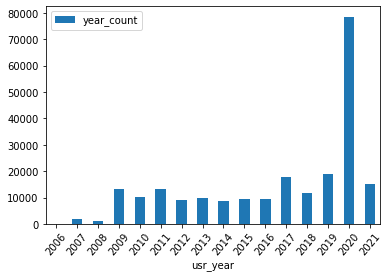

In [33]:
plt.figure(figsize=[40, 45]);
o.plot(x="usr_year", y="year_count", kind="bar", rot=50, fontsize=10);

> Susbicious how tweets in users created in 2020 are signifcally higher than others created in the rest of years even 2021 itself!
> Let's check

In [34]:
print('Saved that in a DF')
users_tweeted_2020 = tweet_df.groupby(['user.id_str','tweet_year','usr_year', 'full_text','days', 'hours']).size().reset_index(name='user_id_count')
users_tweeted_2020 = users_tweeted_2020[users_tweeted_2020['usr_year'] == 2020]
# users_tweeted_2020.to_csv('top_usrs_2021/users_2020_tweeted.csv', index=False)
users_tweeted_2020

Saved that in a DF


,user.id_str,tweet_year,usr_year,full_text,days,hours,user_id_count
29825,1212192062566612992,2021,2020,@givememadIove @DiscussingFilm Me too let’s re...,403,15:21:55,1
29827,1212230939415216128,2021,2020,Amber Heard is obviously abusive there is so m...,449,19:49:05,1
29828,1212242753511231488,2021,2020,Seria incrível se o Johnny Depp Interpretasse ...,443,01:23:31,1
29829,1212245654354849792,2021,2020,I always believe the woman....until she's been...,471,15:29:39,1
29830,1212261020057534464,2021,2020,FUCK YOU AMBER. FUCK YOU #AMBERHEARDISANABUSER,450,07:19:44,1
...,...,...,...,...,...,...,...
110516,1344794412048666624,2021,2020,Here she is admitting of cutting his finger an...,8,19:59:35,1
110517,1344794412048666624,2021,2020,Just a reminder that Amber Heard blatantly lie...,97,17:21:00,1
110518,1344794412048666624,2021,2020,funny how we actually have Amber Heard admitti...,80,19:48:20,1
110519,1344794412048666624,2021,2020,✊🏻 #JusticeForJohnnyDepp,107,20:00:12,1


### What about users from 2021

In [35]:
print('Saved that in a DF')
users_tweeted_2021 = tweet_df.groupby(['user.id_str','tweet_year','usr_year', 'full_text','days', 'hours','user.statuses_count']).size().reset_index(name='user_id_count')
users_tweeted_2021 = users_tweeted_2021[users_tweeted_2021['usr_year'] == 2021]
# users_tweeted_2021.to_csv('top_usrs_2021/users_2021_tweeted.csv', index=False)
users_tweeted_2021

Saved that in a DF


,user.id_str,tweet_year,usr_year,full_text,days,hours,user.statuses_count,user_id_count
110521,1344801369396572160,2021,2021,@realamberheard @Eve_Barlow AMBER HEARD YOU AR...,11,19:46:09,1.0,1
110522,1344820519657377792,2021,2021,#AmberHeardIsALiar is trending and im so glad ...,7,02:15:48,12567.0,1
110523,1344823197045297152,2021,2021,@Marvel Please do not cast Amber Heard in Fant...,12,02:38:57,22.0,1
110524,1344843783293333504,2021,2021,@JohnKincade @jelynchjr @JohnKincade for what ...,42,08:57:00,1302.0,1
110525,1344851682379886592,2021,2021,TFW no Amber Heard gf to punch &amp; choke me.,69,10:28:55,2693.0,1
...,...,...,...,...,...,...,...,...
126269,1385924498445115392,2021,2021,@ComeGeekSome1 @QsBrother1 @LauraBockov #justi...,0,11:08:29,19.0,1
126271,1385957418820116480,2021,2021,Johnny Depp in the 90s\n#grunge #JusticeForJoh...,0,00:24:00,62.0,1
126272,1386029836641185792,2021,2021,@Eve_Barlow @ultragrrrl @realamberheard Appare...,0,06:37:12,35.0,1
126274,1386212884493922304,2021,2021,@Thanos_Decides Amber heard more like amber ne...,0,16:31:37,308.0,1


In [36]:
users_tweeted_same_day = tweet_df.groupby(['user.id_str', 'days']).size().reset_index(name='user_id_count')
users_tweeted_same_day = users_tweeted_same_day[users_tweeted_same_day['days'] <=1]
users_tweeted_same_day = users_tweeted_same_day.sort_values(["days"], ascending=True)
print("Saved that in a DF")
# users_tweeted_same_day.to_csv('top_usrs_2021/users_2021_tweeted_same_day.csv', index=False)
users_tweeted_same_day

Saved that in a DF


,user.id_str,days,user_id_count
57668,1386325621983350784,0,1
55682,1367825096396668928,0,1
57181,1378027082341609472,0,1
55677,1367702384244297728,0,2
55649,1367680235081265152,0,2
...,...,...,...
55472,1366601590333976576,1,1
55449,1366453968377962496,1,1
55446,1366443349683666944,1,1
55803,1368263585466478592,1,6


In [37]:
tweets_day = tweet_df.groupby('tweet_date').size().reset_index(name='date_count')
tweets_day = tweets_day.sort_values(["date_count"], ascending=False)
print("Saved that in a DF")
# tweets_day.to_csv('top_usrs_2021/tweets_day.csv', index=False)
tweets_day

Saved that in a DF


,tweet_date,date_count
83,2021-03-25,15166
111,2021-04-22,10734
76,2021-03-18,9321
58,2021-02-28,7417
7,2021-01-08,7368
...,...,...
48,2021-02-18,788
74,2021-03-16,787
72,2021-03-14,774
47,2021-02-17,725


In [38]:
tweets_day_list = set(list(tweets_day.tweet_date))
tweets_day_list

{'2021-01-01',
 '2021-01-02',
 '2021-01-03',
 '2021-01-04',
 '2021-01-05',
 '2021-01-06',
 '2021-01-07',
 '2021-01-08',
 '2021-01-09',
 '2021-01-10',
 '2021-01-11',
 '2021-01-12',
 '2021-01-13',
 '2021-01-14',
 '2021-01-15',
 '2021-01-16',
 '2021-01-17',
 '2021-01-18',
 '2021-01-19',
 '2021-01-20',
 '2021-01-21',
 '2021-01-22',
 '2021-01-23',
 '2021-01-24',
 '2021-01-25',
 '2021-01-26',
 '2021-01-27',
 '2021-01-28',
 '2021-01-29',
 '2021-01-30',
 '2021-01-31',
 '2021-02-01',
 '2021-02-02',
 '2021-02-03',
 '2021-02-04',
 '2021-02-05',
 '2021-02-06',
 '2021-02-07',
 '2021-02-08',
 '2021-02-09',
 '2021-02-10',
 '2021-02-11',
 '2021-02-12',
 '2021-02-13',
 '2021-02-14',
 '2021-02-15',
 '2021-02-16',
 '2021-02-17',
 '2021-02-18',
 '2021-02-19',
 '2021-02-20',
 '2021-02-21',
 '2021-02-22',
 '2021-02-23',
 '2021-02-24',
 '2021-02-25',
 '2021-02-26',
 '2021-02-27',
 '2021-02-28',
 '2021-03-01',
 '2021-03-02',
 '2021-03-03',
 '2021-03-04',
 '2021-03-05',
 '2021-03-06',
 '2021-03-07',
 '2021-03-

In [39]:
full_data_dates  = tweet_df[tweet_df['tweet_date'].isin(tweets_day_list)]
full_data_dates

,id_str,full_text,user.id_str,user.screen_name,user.name,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
0,1366327088156925952,"Don't really know how Twitter works yet, but t...",1366325095703195648,EdwardK72335033,Edward Kenway,http://pbs.twimg.com/profile_images/1366325486...,1.0,0.0,0.0,0,00:07:35,2021-03-01,09:58:57,2021-03-01,09:51:22,2021,March,2021,March
1,1372541549247143936,"@KittyPitty7 Amber heard is a baddie, she can ...",1372271355983433728,DonnayWeggs,DonnayWeggs,http://pbs.twimg.com/profile_images/1372271493...,92.0,2.0,9.0,0,17:53:16,2021-03-18,13:33:00,2021-03-17,19:39:44,2021,March,2021,March
2,1375709463919742979,#JusticeForJohnnyDepp https://t.co/Y62vPO74Pg,1375707889566769152,iamthedarkworld,Mary Flint,http://pbs.twimg.com/profile_images/1375709785...,2.0,0.0,0.0,0,00:05:59,2021-03-27,07:21:10,2021-03-27,07:15:11,2021,March,2021,March
3,1376830891901779969,#JusticeForJohnnyDepp period,1376826502470328320,lauradeppx,lauRa🏴‍☠️,http://pbs.twimg.com/profile_images/1384711025...,124.0,25.0,25.0,0,00:17:14,2021-03-30,09:37:19,2021-03-30,09:20:05,2021,March,2021,March
4,1355010951322476546,Amber Heard’s behaviors are absolutely sickeni...,1355004442412781568,TheAnon63938801,lyrics_r_loud,http://pbs.twimg.com/profile_images/1355004656...,9.0,6.0,109.0,0,00:25:39,2021-01-29,04:32:40,2021-01-29,04:07:01,2021,January,2021,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228668,1384603251161640963,#AmberHeardIsALiar\n#JusticeForJohnnyDepp,1022522684498947968,pizzakatzen,🍕🐈,http://pbs.twimg.com/profile_images/1292456387...,5733.0,247.0,296.0,999,03:38:54,2021-04-20,20:21:54,2018-07-26,16:43:00,2021,April,2018,July
228669,1382992730964561922,people digging dirt on amber heard not bc they...,1020796946846572416,DANYANAKlN,em,http://pbs.twimg.com/profile_images/1386858104...,24752.0,320.0,177.0,999,11:16:44,2021-04-16,09:42:16,2018-07-21,22:25:32,2021,April,2018,July
228670,1349303383514112001,Yes! A day after she supposedly had multiple c...,987240830351151232,PrinConsuella_,Princess Consuela Bananahammock,http://pbs.twimg.com/profile_images/1379816511...,30157.0,1028.0,519.0,999,02:27:20,2021-01-13,10:32:50,2018-04-20,08:05:30,2021,January,2018,April
228671,1349293010450853888,"Loves, I need Kate James second declaration. I...",987240830351151232,PrinConsuella_,Princess Consuela Bananahammock,http://pbs.twimg.com/profile_images/1379816511...,30157.0,1028.0,519.0,999,01:46:07,2021-01-13,09:51:37,2018-04-20,08:05:30,2021,January,2018,April


In [40]:
print('trendy dates')
trendy_dates = tweets_day[tweets_day.date_count >=4000]
trendy_dates

trendy dates


,tweet_date,date_count
83,2021-03-25,15166
111,2021-04-22,10734
76,2021-03-18,9321
58,2021-02-28,7417
7,2021-01-08,7368
105,2021-04-16,6018
84,2021-03-26,5321
6,2021-01-07,5147
2,2021-01-03,4813
41,2021-02-11,4051


<Figure size 2880x3240 with 0 Axes>

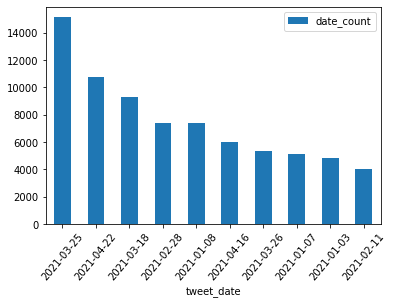

In [41]:
plt.figure(figsize=[40, 45]);
trendy_dates.plot(x="tweet_date", y="date_count", kind="bar", rot=50, fontsize=10);

In [42]:
trend_dates = set(list(trendy_dates.tweet_date))
trend_dates

{'2021-01-03',
 '2021-01-07',
 '2021-01-08',
 '2021-02-11',
 '2021-02-28',
 '2021-03-18',
 '2021-03-25',
 '2021-03-26',
 '2021-04-16',
 '2021-04-22'}

In [67]:
print('Saved in a DF')
full_data_trendy_dates = tweet_df[tweet_df['tweet_date'].isin(trend_dates)]
# full_data_trendy_dates.to_csv('trendy_dates2021.csv', index=False)
full_data_trendy_dates

Saved in a DF


,id_str,full_text,user.id_str,user.screen_name,user.name,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
1,1372541549247143936,"@KittyPitty7 Amber heard is a baddie, she can ...",1.372271e+18,DonnayWeggs,DonnayWeggs,http://pbs.twimg.com/profile_images/1372271493...,92.0,2.0,9.0,0,17:53:16,2021-03-18,13:33:00,2021-03-17,19:39:44,2021,March,2021,March
8,1360003793367281674,Now watching Salazar’s Revenge (Dead Men Tell ...,1.359661e+18,moineaujoyeux,/leɪna/,http://pbs.twimg.com/profile_images/1365378135...,54.0,6.0,61.0,0,22:42:22,2021-02-11,23:12:26,2021-02-11,00:30:04,2021,February,2021,February
12,1345837352200105984,the best form of therapy #JusticeForJohnnyDepp...,1.345534e+18,miaa1_7,miaa,http://pbs.twimg.com/profile_images/1346588149...,1712.0,87.0,150.0,0,20:05:30,2021-01-03,21:00:03,2021-01-03,00:54:33,2021,January,2021,January
20,1375160876081242112,Voilà ce que vos conneries de femelles hystéri...,1.375018e+18,akhbatard,Allah AKHBATARD,http://pbs.twimg.com/profile_images/1375021655...,10.0,0.0,0.0,0,09:28:32,2021-03-25,19:01:16,2021-03-25,09:32:44,2021,March,2021,March
21,1359934361760641025,@DeppMovieNight @029_MB Yay! #WeStandWithJohnn...,1.359661e+18,moineaujoyeux,/leɪna/,http://pbs.twimg.com/profile_images/1365378135...,54.0,6.0,61.0,0,18:06:28,2021-02-11,18:36:32,2021-02-11,00:30:04,2021,February,2021,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228649,1383145747290411010,Johnny Depp has given y’all more than enough t...,1.021001e+18,Poppytrixx,Poppy 💕,http://pbs.twimg.com/profile_images/1349663729...,9659.0,2945.0,2685.0,999,07:53:38,2021-04-16,19:50:18,2018-07-22,11:56:40,2021,April,2018,July
228656,1385314880480321537,reverse the images and its me seeing the hasht...,1.023168e+18,Osena52,mark,http://pbs.twimg.com/profile_images/1384598564...,6558.0,130.0,466.0,999,08:03:43,2021-04-22,19:29:40,2018-07-28,11:25:57,2021,April,2018,July
228661,1383142797373427712,"Johnny Depp thriving, we love to see it #Justi...",1.021001e+18,Poppytrixx,Poppy 💕,http://pbs.twimg.com/profile_images/1349663729...,9659.0,2945.0,2685.0,999,07:41:55,2021-04-16,19:38:35,2018-07-22,11:56:40,2021,April,2018,July
228669,1382992730964561922,people digging dirt on amber heard not bc they...,1.020797e+18,DANYANAKlN,em,http://pbs.twimg.com/profile_images/1386858104...,24752.0,320.0,177.0,999,11:16:44,2021-04-16,09:42:16,2018-07-21,22:25:32,2021,April,2018,July


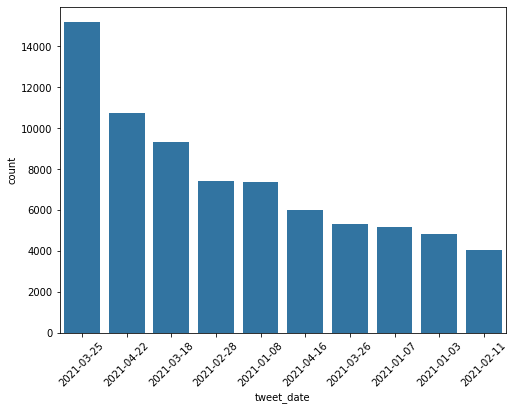

In [44]:
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = full_data_trendy_dates['tweet_date'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=full_data_trendy_dates, x='tweet_date', color=base_color, order=freq.index);
plt.xticks(rotation=45);

> Trendy date with highest tweets is 25/03/2021 and Mar.. has trendy dates than others

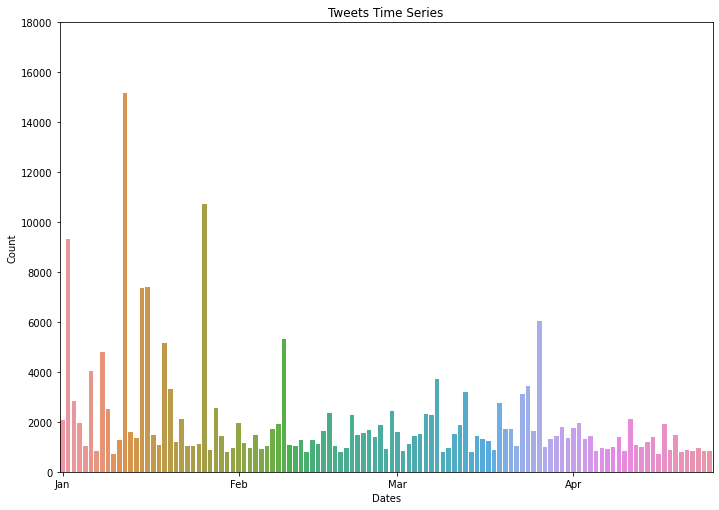

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = 'tweet_date', data = full_data_dates)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Dates')
plt.ylim(0,18000)
plt.ylabel('Count')
plt.title('Tweets Time Series')
plt.show()

> As we can see distribution of tweets is more in jan,feb, Mar.

In [46]:
A = tweet_df[tweet_df['tweet_date']== '2021-01-03'].sort_values(["days"], ascending=True)
print("Saved that and for each trendy date in a DF")
A
# A.to_csv('top_usrs_2021/2021-01-03.csv', index=False)

Saved that and for each trendy date in a DF


,id_str,full_text,user.id_str,user.screen_name,user.name,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
12,1345837352200105984,the best form of therapy #JusticeForJohnnyDepp...,1345533941487382528,miaa1_7,miaa,http://pbs.twimg.com/profile_images/1346588149...,1712.0,87.0,150.0,0,20:05:30,2021-01-03,21:00:03,2021-01-03,00:54:33,2021,January,2021,January
408,1345707306260910080,I very like this movie😂😂 #depphead #DeppMovieN...,1345560174287699968,Bella39962373,Bella🦋,http://pbs.twimg.com/profile_images/1345561048...,7.0,1.0,27.0,0,09:42:03,2021-01-03,12:23:18,2021-01-03,02:41:15,2021,January,2021,January
362,1345832907064152065,#JusticeForJohnnyDepp #WeStandWithJohnnyDepp #...,1345533941487382528,miaa1_7,miaa,http://pbs.twimg.com/profile_images/1346588149...,1712.0,87.0,150.0,0,19:47:51,2021-01-03,20:42:24,2021-01-03,00:54:33,2021,January,2021,January
322,1345731142020980738,"""Alice in Wonderland"" watched✔ #DeppMovieNight...",1345544044429135872,GraceSparrow13,GraceSparrow,http://pbs.twimg.com/profile_images/1345544181...,41.0,2.0,2.0,0,12:23:18,2021-01-03,13:58:01,2021-01-03,01:34:43,2021,January,2021,January
207,1345815856144642053,"“Good morning star shine, the Earth says hello...",1345533941487382528,miaa1_7,miaa,http://pbs.twimg.com/profile_images/1346588149...,1712.0,87.0,150.0,0,18:40:05,2021-01-03,19:34:38,2021-01-03,00:54:33,2021,January,2021,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188949,1345840286912696323,#Johnuary #DeppMovieNight #JusticeForJohnnyDepp,6323772,Angiex0101,Nor33 🇫🇷,http://pbs.twimg.com/profile_images/1384567498...,13101.0,159.0,53.0,4972,02:16:05,2021-01-03,21:11:43,2007-05-25,18:55:38,2021,January,2007,May
188960,1345820135181983750,@JarOfTurd Is itv participating in #DeppMovieN...,6323772,Angiex0101,Nor33 🇫🇷,http://pbs.twimg.com/profile_images/1384567498...,13101.0,159.0,53.0,4972,00:56:01,2021-01-03,19:51:39,2007-05-25,18:55:38,2021,January,2007,May
188946,1345813783994904581,#DeppMovieNight #Johnuary #JusticeForJohnnyDepp,6323772,Angiex0101,Nor33 🇫🇷,http://pbs.twimg.com/profile_images/1384567498...,13101.0,159.0,53.0,4972,00:30:46,2021-01-03,19:26:24,2007-05-25,18:55:38,2021,January,2007,May
188947,1345813306242641920,@ComeGeekSome1 #DeppMovieNight #Johnuary #Just...,6323772,Angiex0101,Nor33 🇫🇷,http://pbs.twimg.com/profile_images/1384567498...,13101.0,159.0,53.0,4972,00:28:52,2021-01-03,19:24:30,2007-05-25,18:55:38,2021,January,2007,May


In [47]:
freq_usrs = tweet_df.groupby('user.id_str').size().reset_index(name='id_count')
freq_usrs = freq_usrs[freq_usrs["id_count"] > 1]
freq_usrs = freq_usrs.sort_values(["id_count"], ascending=False)
print("Saved that in a DF")
# freq_usrs.to_csv('top_usrs_2021/freq_usrs_2021.csv', index=False)
freq_usrs

Saved that in a DF


,user.id_str,id_count
27959,232377398,2535
46974,932229195681488768,2379
46081,903178544343162752,1770
9495,1224741218116161536,1674
15227,1298871480713961472,1666
...,...,...
21543,1359976309024198912,2
21535,1359936251986599936,2
21534,1359931811330162688,2
21528,1359892783033708288,2


In [48]:
t = pd.read_csv('top_usrs_2021/freq_usrs_2021.csv')
# t['usr_year'].value_counts()
t

,user.id_str,id_count
0,232377398,2535
1,932229195681488768,2379
2,903178544343162752,1770
3,1224741218116161536,1674
4,1298871480713961472,1666
...,...,...
12717,1359976309024198912,2
12718,1359936251986599936,2
12719,1359931811330162688,2
12720,1359892783033708288,2


## let's check the distribution for different features to visualize them correctly

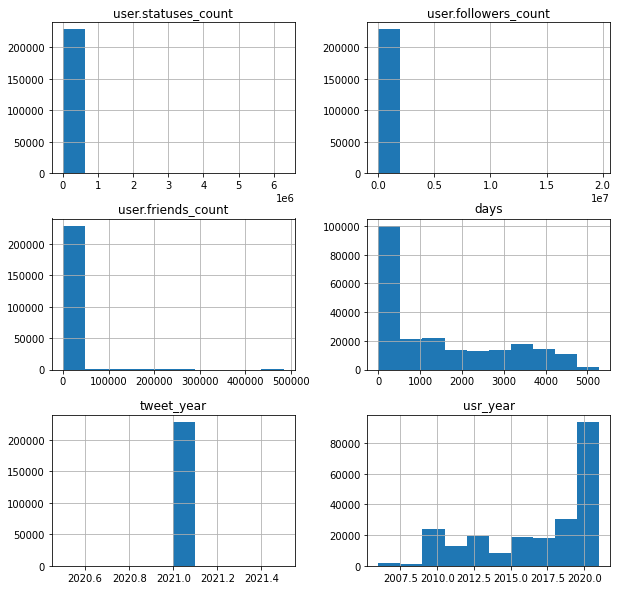

In [49]:
tweet_df.hist(figsize=(10,10));

## checking the distribution of the days

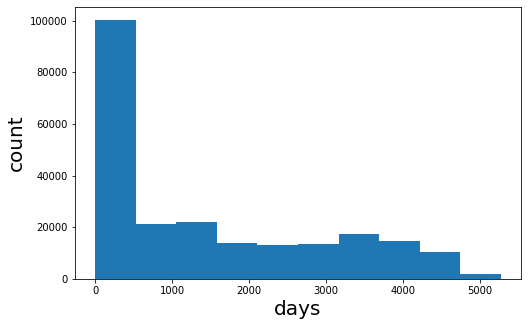

In [50]:
plt.figure(figsize=[8, 5])
plt.hist(data = tweet_df, x = 'days')
plt.xlabel('days', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.show();

> users tweeted in less than 24 hours after creation showing ubnormal count!

## usr creation counts in various years

In [51]:
tweet_df.usr_year.value_counts()

2020    78525
2019    19022
2017    17973
2021    15007
2009    13367
2011    13195
2018    11741
2010    10363
2013     9912
2015     9491
2016     9375
2012     9234
2014     8581
2007     1852
2008     1030
2006        5
Name: usr_year, dtype: int64

In [52]:
tweet_df.groupby("usr_year")["usr_month"].value_counts()

usr_year  usr_month
2006      December        2
          November        2
          October         1
2007      May          1679
          November       43
                       ... 
2020      January      2044
2021      January      5972
          February     4902
          March        3213
          April         920
Name: usr_month, Length: 175, dtype: int64

> large no. in 2020 and 2019 and seems that specific months too will explore that later

In [53]:
tweet_df.groupby("tweet_year")["usr_month"].value_counts()

tweet_year  usr_month
2021        November     28237
            August       24664
            December     20721
            February     19605
            July         19090
            March        18026
            June         17459
            January      17283
            October      16970
            May          16792
            September    15377
            April        14449
Name: usr_month, dtype: int64

> large no. in 2020 and 2019 and seems that specific months too will explore that later

## Let's explore more

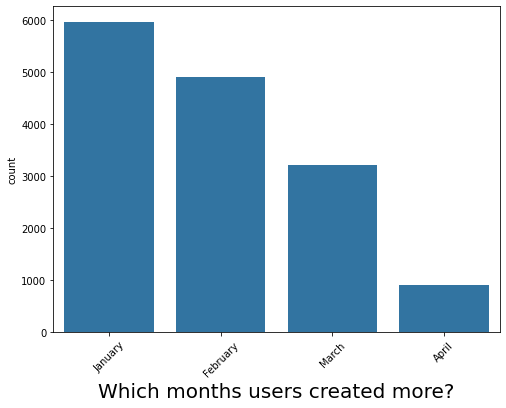

In [54]:
filtrd_df = tweet_df[tweet_df['usr_year'] == 2021]
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = filtrd_df['usr_month'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=filtrd_df, x='usr_month', color=base_color, order=freq.index);
plt.xticks(rotation=45);
plt.xlabel('Which months users created more?', fontsize=20);

> seems that Jan. Feb.have more usrs created

> seems that Nov. Aug., Dec., Feb. have more usrs created

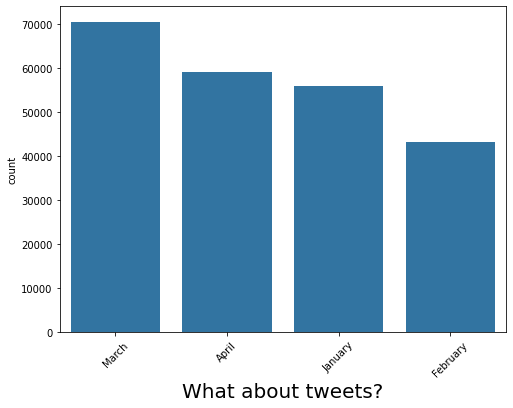

In [55]:
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = tweet_df['tweet_month'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=tweet_df, x='tweet_month', color=base_color, order=freq.index);
plt.xticks(rotation=45);
plt.xlabel('What about tweets?', fontsize=20);

> Mar., Apr., Jan., interesting matching .. must have some events

> Have matching months

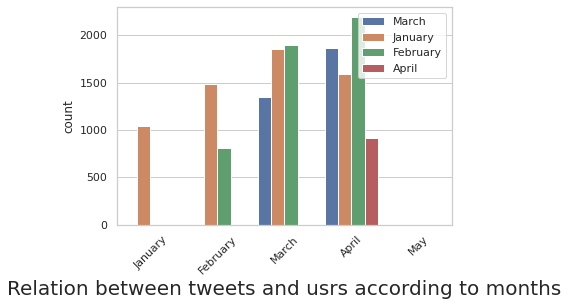

In [56]:
sns.set(style="whitegrid")
month_order = ['January', 'February', 'March', 'April', 'May']
sb.countplot(data = tweet_df[tweet_df['usr_year'] == 2021], x='tweet_month', order=month_order, hue='usr_month')
plt.legend(loc='upper right')
plt.xticks(rotation=45);
plt.xlabel('Relation between tweets and usrs according to months', fontsize=20);

> Mixing both .. march is the top rated in both.

In [96]:
## making a cutting function
def cutting(col_name):    
    return pd.cut(tweet_df[col_name], bins=4, labels=['very low','low', 'medium','high'])
tweet_df['cut_days']=cutting('days')

In [97]:
tweet_df['cut_followers']=cutting('user.followers_count')
tweet_df['cut_friends']=cutting('user.friends_count')

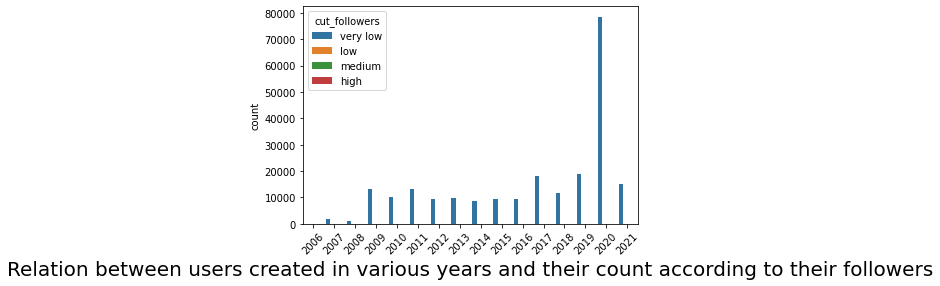

In [98]:
sb.countplot(data = tweet_df, x='usr_year', hue='cut_followers')
plt.xticks(rotation=45);
plt.xlabel('Relation between users created in various years and their count according to their followers', fontsize=20);

> The most users tweeted are those created in 2020 and interesting how they have the least followers count.

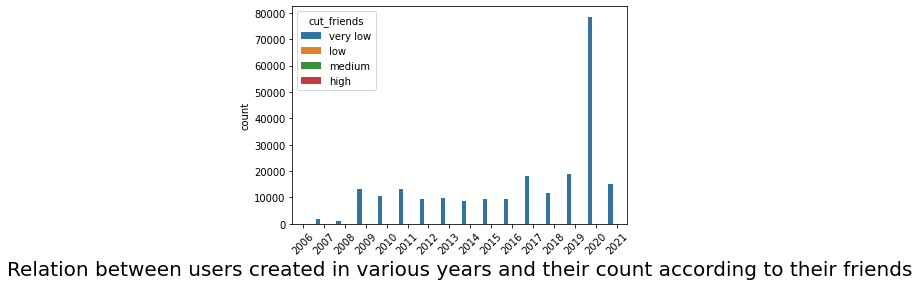

In [100]:
sb.countplot(data = tweet_df, x='usr_year', hue='cut_friends')
plt.xticks(rotation=45);
plt.xlabel('Relation between users created in various years and their count according to their friends', fontsize=20);

> Interesting, although users from 2020 are the highest tweeting users in 2021, but they have the least followers and friends count which means they are susbicious

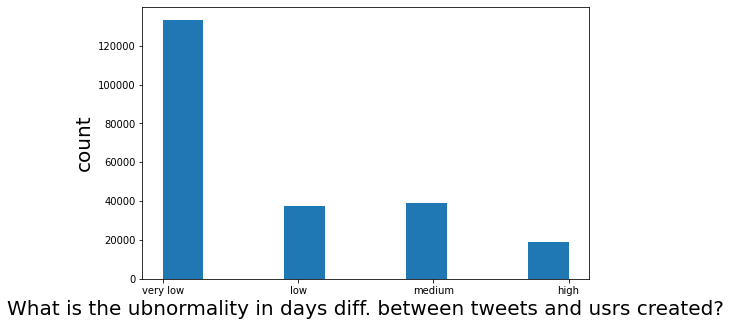

In [101]:
plt.figure(figsize=[8, 5])
plt.hist(data = tweet_df, x = 'cut_days')
plt.xlabel('cut_days', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.xlabel('What is the ubnormality in days diff. between tweets and usrs created?', fontsize=20);
plt.show();

> most of 2021 users tweeted within short time.

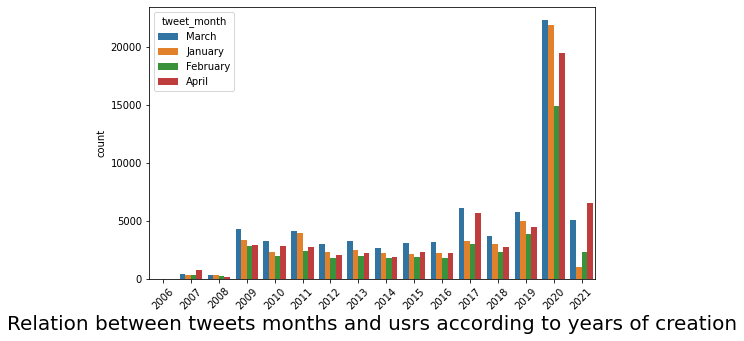

In [102]:
plt.figure(figsize=[8, 5])
month_order = ['January', 'February', 'March', 'April']
sb.countplot(data = tweet_df, x='usr_year', hue='tweet_month')
plt.xticks(rotation=45);
plt.xlabel('Relation between tweets months and usrs according to years of creation', fontsize=20);

> we can see here that 2020 user year is the highest occupation of tweets, then 2018,2019,2021 .. but seems that users 2020 most tweeted in march and january and april .. 2018, 2019 most tweeted the same as 2020, .. 2021 most tweets in march and april while april is more than march.. less in jan 

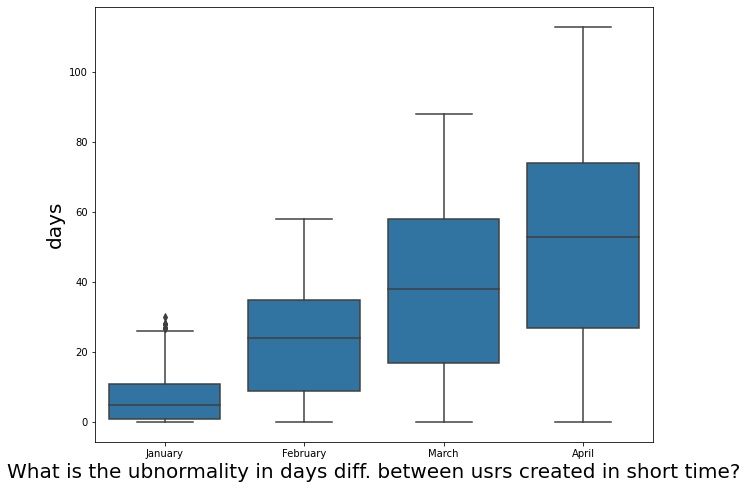

In [103]:
plt.figure(figsize=[10, 8])
sb.boxplot(data=filtrd_df, x='tweet_month', y='days',order=['January', 'February', 'March', 'April'], color=base_color);
plt.xlabel('tweet_month', fontsize=20);
plt.ylabel('days', fontsize=20);
plt.xlabel('What is the ubnormality in days diff. between usrs created in short time?', fontsize=20);


> in Apr,., and Mar. have tweeted more within almost two months, but Jan. and Feb. is the shortest most tweets within days.

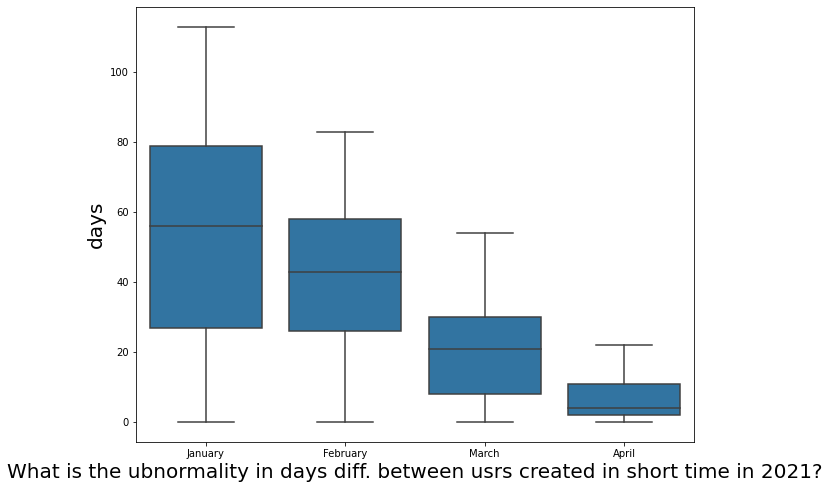

In [105]:
plt.figure(figsize=[10, 8])
sb.boxplot(data=tweet_df[tweet_df['usr_year']==2021], x='usr_month', y='days',order=['January', 'February', 'March', 'April'], color=base_color);
plt.xlabel('usr_month', fontsize=20);
plt.xlabel('What is the ubnormality in days diff. between usrs created in short time in 2021?', fontsize=20);
plt.ylabel('days', fontsize=20);

> Here is matching the above.

> # scatter plot of days vs. usr_month, with log transform on days y axis

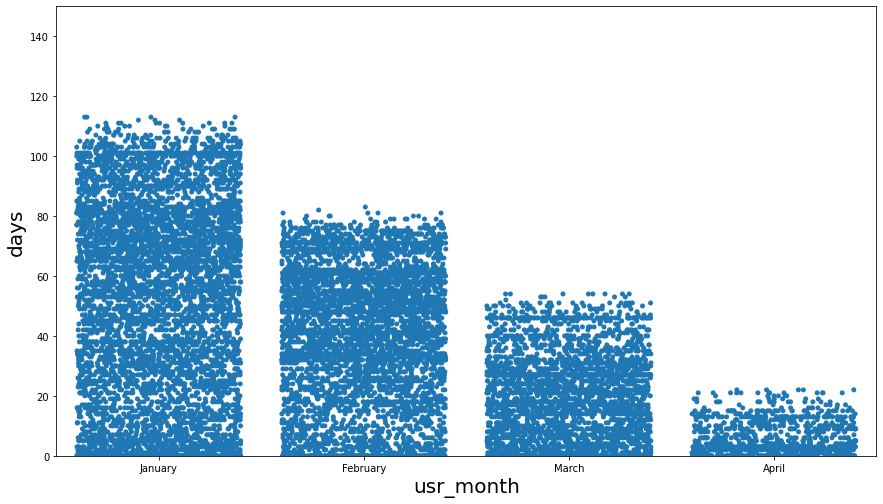

In [134]:

plt.figure(figsize = [14.70, 8.27])
sb.stripplot(data = tweet_df[tweet_df['usr_year'] == 2021], x = 'usr_month', y = 'days', jitter = 0.40, color = base_color, order = ['January', 'February', 'March', 'April'])
plt.xlabel('usr_month', fontsize=20)
plt.ylim(0, 150)
plt.ylabel('days', fontsize=20)
plt.show();

> Each month have bulky regions can be explored more in each month.

In [139]:
clean_df = tweet_df.copy()
clean_df

,id_str,full_text,user.id_str,user.screen_name,user.name,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
0,1366327088156925952,"Don't really know how Twitter works yet, but t...",1.366325e+18,EdwardK72335033,Edward Kenway,http://pbs.twimg.com/profile_images/1366325486...,1.0,0.0,0.0,0,00:07:35,2021-03-01,09:58:57,2021-03-01,09:51:22,2021,March,2021,March
1,1372541549247143936,"@KittyPitty7 Amber heard is a baddie, she can ...",1.372271e+18,DonnayWeggs,DonnayWeggs,http://pbs.twimg.com/profile_images/1372271493...,92.0,2.0,9.0,0,17:53:16,2021-03-18,13:33:00,2021-03-17,19:39:44,2021,March,2021,March
2,1375709463919742979,#JusticeForJohnnyDepp https://t.co/Y62vPO74Pg,1.375708e+18,iamthedarkworld,Mary Flint,http://pbs.twimg.com/profile_images/1375709785...,2.0,0.0,0.0,0,00:05:59,2021-03-27,07:21:10,2021-03-27,07:15:11,2021,March,2021,March
3,1376830891901779969,#JusticeForJohnnyDepp period,1.376827e+18,lauradeppx,lauRa🏴‍☠️,http://pbs.twimg.com/profile_images/1384711025...,124.0,25.0,25.0,0,00:17:14,2021-03-30,09:37:19,2021-03-30,09:20:05,2021,March,2021,March
4,1355010951322476546,Amber Heard’s behaviors are absolutely sickeni...,1.355004e+18,TheAnon63938801,lyrics_r_loud,http://pbs.twimg.com/profile_images/1355004656...,9.0,6.0,109.0,0,00:25:39,2021-01-29,04:32:40,2021-01-29,04:07:01,2021,January,2021,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228668,1384603251161640963,#AmberHeardIsALiar\n#JusticeForJohnnyDepp,1.022523e+18,pizzakatzen,🍕🐈,http://pbs.twimg.com/profile_images/1292456387...,5733.0,247.0,296.0,999,03:38:54,2021-04-20,20:21:54,2018-07-26,16:43:00,2021,April,2018,July
228669,1382992730964561922,people digging dirt on amber heard not bc they...,1.020797e+18,DANYANAKlN,em,http://pbs.twimg.com/profile_images/1386858104...,24752.0,320.0,177.0,999,11:16:44,2021-04-16,09:42:16,2018-07-21,22:25:32,2021,April,2018,July
228670,1349303383514112001,Yes! A day after she supposedly had multiple c...,9.872408e+17,PrinConsuella_,Princess Consuela Bananahammock,http://pbs.twimg.com/profile_images/1379816511...,30157.0,1028.0,519.0,999,02:27:20,2021-01-13,10:32:50,2018-04-20,08:05:30,2021,January,2018,April
228671,1349293010450853888,"Loves, I need Kate James second declaration. I...",9.872408e+17,PrinConsuella_,Princess Consuela Bananahammock,http://pbs.twimg.com/profile_images/1379816511...,30157.0,1028.0,519.0,999,01:46:07,2021-01-13,09:51:37,2018-04-20,08:05:30,2021,January,2018,April


### Now let's move deeper .. what are the top months in 2021 have the most usr creation?

In [107]:
clean_df[clean_df['usr_year']== 2021]['usr_month'].value_counts()

January     5972
February    4902
March       3213
April        920
Name: usr_month, dtype: int64

In [108]:
clean_df[clean_df['usr_year']== 2021].shape

(15007, 22)

> 15007 in 2021 users
          
         
> what about 2020

### Now let's move deeper .. what are the top months in 2020 have the most usr creation?

In [109]:
clean_df[clean_df['usr_year']== 2020]['usr_month'].value_counts()

November     14266
August       11876
October       8043
July          8012
December      6904
September     6381
February      5361
May           4421
March         4354
June          4106
April         2757
January       2044
Name: usr_month, dtype: int64

In [110]:
z = clean_df[clean_df['usr_year']== 2020]
z.shape

(78525, 22)

> 78525 usrs were created in 2020 only .. by investigating each month seperately must have something in common

### Users from other years not 2020/2021

In [111]:
(clean_df[clean_df['usr_year']!= 2020].shape[0]) - (clean_df[clean_df['usr_year']== 2021].shape[0])


135141

> Proportion of users from 2020 is higher than other years 

In [157]:
clean_df['tweet_date'] = pd.to_datetime(clean_df['tweet_date'])
clean_df['user_create_date'] = pd.to_datetime(clean_df['user_create_date'])

# Estimation for tweets in various months in 2021 

### February ...

In [158]:
F = clean_df[clean_df['tweet_month']== 'February'].sort_values(["days"], ascending=True)
F = F[F['tweet_month'] == 'February']
print(F.shape[0])
F

43246


,id_str,full_text,user.id_str,user.screen_name,user.name,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
8,1360003793367281674,Now watching Salazar’s Revenge (Dead Men Tell ...,1.359661e+18,moineaujoyeux,/leɪna/,http://pbs.twimg.com/profile_images/1365378135...,54.0,6.0,61.0,0,22:42:22,2021-02-11,23:12:26,2021-02-11,00:30:04,2021,February,2021,February
484,1359965462264762368,@edward_bi_qechi @Change ۱۰گیگ نتم تمام شدد هم...,1.359824e+18,astromindadepp,Astromindadepp,http://pbs.twimg.com/profile_images/1359824913...,10.0,5.0,12.0,0,09:20:23,2021-02-11,20:40:07,2021-02-11,11:19:44,2021,February,2021,February
496,1358473932832202754,@DeppMovieNight @Bhr14475543 😻\n#deppmovienigh...,1.358158e+18,liya_kitten,qazal,http://pbs.twimg.com/profile_images/1358158855...,191.0,10.0,7.0,0,20:55:42,2021-02-07,17:53:19,2021-02-06,20:57:37,2021,February,2021,February
497,1359988604706164737,"1. Charlie and the Chocolate Factory, 2. Sween...",1.359661e+18,moineaujoyeux,/leɪna/,http://pbs.twimg.com/profile_images/1365378135...,54.0,6.0,61.0,0,21:42:01,2021-02-11,22:12:05,2021-02-11,00:30:04,2021,February,2021,February
499,1359170413977296900,Amber heard is a liar #JusticeForJohhnyDepp,1.359117e+18,Justice68222721,Justiceforjohnnydepp,http://pbs.twimg.com/profile_images/1359118497...,25.0,19.0,42.0,0,03:32:22,2021-02-09,16:00:53,2021-02-09,12:28:31,2021,February,2021,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191934,1360675266754977792,Johnny Depp Exercises Some Free Speech With AC...,8.176450e+05,WeSmirch,WeSmirch,http://pbs.twimg.com/profile_images/26169952/w...,120477.0,2807.0,4.0,5092,09:26:58,2021-02-13,19:40:38,2007-03-07,10:13:40,2021,February,2007,March
192321,1366046486882971650,it’s nice that there are controversies people ...,8.901010e+05,mediajunkie,xian,http://pbs.twimg.com/profile_images/1362484122...,134416.0,6210.0,5440.0,5103,15:49:05,2021-02-28,15:23:57,2007-03-10,23:34:52,2021,February,2007,March
192322,1366110305546305536,Amber Heard can pick up her merch here just li...,8.996710e+05,RexDixon,Mark Z,http://pbs.twimg.com/profile_images/1349757787...,34103.0,1942.0,775.0,5103,14:57:14,2021-02-28,19:37:32,2007-03-11,04:40:18,2021,February,2007,March
192871,1357578861358284800,Amber Heard On Marilyn Manson Abuse Allegation...,7.630300e+04,journallnews,lafrance,http://pbs.twimg.com/profile_images/6330475984...,125559.0,625.0,420.0,5163,05:58:12,2021-02-05,06:36:37,2006-12-18,00:38:25,2021,February,2006,December


In [149]:
F[F['usr_year'] == 2020]['user.id_str'].value_counts()

1.224741e+18    560
1.290639e+18    346
1.340319e+18    269
1.298871e+18    264
1.236500e+18    258
               ... 
1.266561e+18      1
1.302097e+18      1
1.338178e+18      1
1.324828e+18      1
1.218508e+18      1
Name: user.id_str, Length: 3149, dtype: int64

In [150]:
print('Fresh users in 2021 are most tweeted on Feb.')
F['usr_year'].value_counts()

Fresh users in 2021 are most tweeted on Feb.


2020    14902
2019     3828
2017     2955
2009     2790
2011     2419
2018     2343
2021     2299
2013     1932
2010     1929
2015     1863
2012     1825
2014     1790
2016     1788
2007      366
2008      215
2006        2
Name: usr_year, dtype: int64

In [159]:
F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43246 entries, 8 to 193005
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_str                  43246 non-null  int64         
 1   full_text               43246 non-null  object        
 2   user.id_str             43246 non-null  float64       
 3   user.screen_name        43246 non-null  object        
 4   user.name               43246 non-null  object        
 5   user.profile_image_url  43246 non-null  object        
 6   user.statuses_count     43246 non-null  float64       
 7   user.followers_count    43246 non-null  float64       
 8   user.friends_count      43246 non-null  float64       
 9   days                    43246 non-null  int64         
 10  hours                   43246 non-null  object        
 11  tweet_date              43246 non-null  datetime64[ns]
 12  tweet_time              43246 non-null  objec

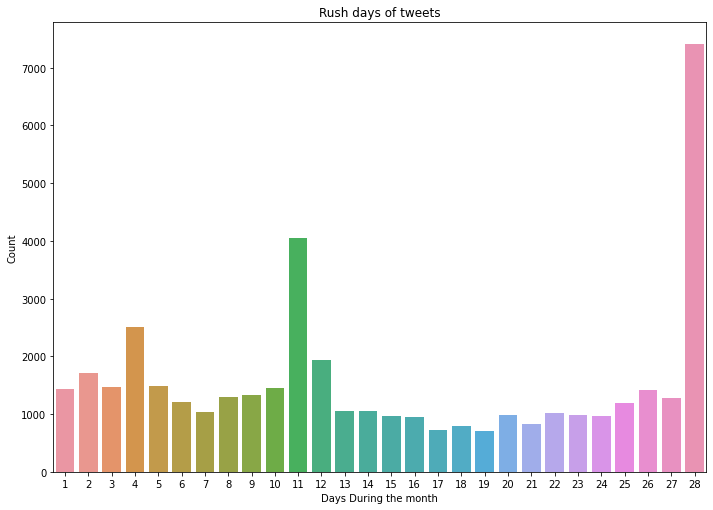

In [161]:
fltrd_F = F[F['tweet_month']== 'February'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_F['tweet_date'].dt.day, data = F)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

>In Feb. peaks are (4,11,12,28).

In [69]:
tt = F.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2021]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2021 users:', (tt.shape[0]))
tt

no. of tweet in same day: 241
no. of tweet from 2021 users: 2299


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
43244,1.366052e+18,February,2021,"Me, but in direct sunlight with no glasses of ...",0,00:43:06,2021-02-28,February,1
42907,1.359687e+18,February,2021,@BuzzFeed Maybe the DCEU will take a lesson fr...,0,12:12:53,2021-02-11,February,1
42904,1.359661e+18,February,2021,Watching On Stranger Tides now! Film no. 7 #Ju...,0,21:01:53,2021-02-11,February,1
42903,1.359661e+18,February,2021,Trending in the UK! #JusticeForJohnnyDepp #Dep...,0,21:16:02,2021-02-11,February,1
42901,1.359661e+18,February,2021,Sweeney Todd next! #DeppMovieNight #JusticeFor...,0,09:24:01,2021-02-11,February,1
...,...,...,...,...,...,...,...,...,...
40972,1.345136e+18,February,2021,@WholeLottaOW Amber Heard pack going off rn ht...,57,19:50:29,2021-02-28,January,1
40973,1.345240e+18,February,2021,"@Ven0m_JJ Tweet that says ""I believe in amber ...",57,09:27:58,2021-02-28,January,1
40977,1.345310e+18,February,2021,Is it true? I hope so much that it's true. #J...,57,10:57:47,2021-02-28,January,1
40954,1.344995e+18,February,2021,"""Amber Heard"" trying to get on the set of Aqua...",58,06:35:33,2021-02-28,January,1


In [68]:
freq_usrs_feb = F.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_feb.shape[0]))
freq_usrs_feb

no. of all frequent users: 14843


,user.id_str,id_count
0,3.872300e+04,1
1,7.630300e+04,1
2,8.176450e+05,1
3,8.901010e+05,1
4,8.996710e+05,1
...,...,...
14838,1.365942e+18,1
14839,1.365973e+18,1
14840,1.365985e+18,1
14841,1.366004e+18,2


In [70]:
freq_fresh_usrs_feb = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2021) :', (freq_fresh_usrs_feb.shape[0]))
freq_fresh_usrs_feb

no. of frequent fresh users (2021) : 855


,user.id_str,id_count
0,1.344844e+18,1
1,1.344869e+18,1
2,1.344908e+18,3
3,1.344922e+18,1
4,1.344981e+18,2
...,...,...
850,1.365942e+18,1
851,1.365973e+18,1
852,1.365985e+18,1
853,1.366004e+18,2


In [71]:
freq_feb_usrs = set(list(freq_fresh_usrs_feb["user.id_str"]))
len(freq_feb_usrs)

855

In [72]:
freq_feb_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_feb_usrs)]
print('How often did those users created in august tweeted after that in 2020?')
freq_feb_usrs_all_data['tweet_month'].value_counts()

How often did those users created in august tweeted after that in 2020?


April       2458
February    2299
March       2135
January      627
Name: tweet_month, dtype: int64

### The same here (43246 tweets) .. from (2299 users) tweeted in the same year of creation
#### no. of tweet from fresh users in same day: 240
#### Total no. of tweet from 2021 users: 855

### April ...

In [164]:
G = clean_df[clean_df['tweet_month']== 'April'].sort_values(["days"], ascending=True)
G = G[G['tweet_month'] == 'April']
print(G.shape[0])
G

59104


,id_str,full_text,user.id_str,user.screen_name,user.name,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
56,1385585289733812224,#JusticeForJohnnyDepp,1.385324e+18,depprotecti,Protect The Innocent,http://pbs.twimg.com/profile_images/1385325650...,28.0,0.0,8.0,0,17:17:54,2021-04-23,13:24:10,2021-04-22,20:06:16,2021,April,2021,April
414,1385671877268578308,#JusticeForJohnnyDepp,1.385324e+18,depprotecti,Protect The Innocent,http://pbs.twimg.com/profile_images/1385325650...,28.0,0.0,8.0,0,23:01:58,2021-04-23,19:08:14,2021-04-22,20:06:16,2021,April,2021,April
413,1385343403622387716,AmbieTurd is a big mf liar...\n#JusticeForJohn...,1.385324e+18,depprotecti,Protect The Innocent,http://pbs.twimg.com/profile_images/1385325650...,28.0,0.0,8.0,0,01:16:44,2021-04-22,21:23:00,2021-04-22,20:06:16,2021,April,2021,April
411,1385340297828311044,🌍❤️ @dior\n#JusticeForJohnnyDepp,1.385324e+18,depprotecti,Protect The Innocent,http://pbs.twimg.com/profile_images/1385325650...,28.0,0.0,8.0,0,01:04:24,2021-04-22,21:10:40,2021-04-22,20:06:16,2021,April,2021,April
410,1379141769728823303,"The one who laughs last, laughs best !! #Justi...",1.379041e+18,3Kaffe,kaffe * 3 ☕️/ Flossie Dickey,http://pbs.twimg.com/profile_images/1387092320...,1114.0,185.0,245.0,0,06:40:43,2021-04-05,18:39:55,2021-04-05,11:59:12,2021,April,2021,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191936,1385133040825892864,"Buon compleanno Amber Heard, le foto dell’attr...",5.893702e+06,SkyTG24,Sky tg24,http://pbs.twimg.com/profile_images/1144638925...,304417.0,3264942.0,345.0,5096,21:28:40,2021-04-22,07:27:06,2007-05-09,09:58:26,2021,April,2007,May
192510,1384136401545928706,Volgens Johnny Depp heeft hij nieuwe verklarin...,2.902821e+06,telegraaf,De Telegraaf,http://pbs.twimg.com/profile_images/7397631059...,585725.0,654821.0,774.0,5134,14:57:30,2021-04-19,13:26:48,2007-03-29,22:29:18,2021,April,2007,March
192761,1385172076181479427,"Horoscopes April 22, 2021: Amber Heard, follow...",1.289321e+06,EastBayTimes,East Bay Times,http://pbs.twimg.com/profile_images/7173824884...,206963.0,71518.0,1095.0,5150,19:37:04,2021-04-22,10:02:12,2007-03-16,14:25:08,2021,April,2007,March
192762,1383137021959503879,EXCLUSIVE: Johnny Depp says new police testimo...,8.176450e+05,WeSmirch,WeSmirch,http://pbs.twimg.com/profile_images/26169952/w...,120483.0,2807.0,4.0,5154,09:01:58,2021-04-16,19:15:38,2007-03-07,10:13:40,2021,April,2007,March


In [77]:
print('Fresh users in 2020 are most tweeted on Apr.')
G['usr_year'].value_counts()

Fresh users in 2020 are most tweeted on Apr.


2020    19462
2021     6570
2017     5641
2019     4473
2009     2945
2010     2828
2018     2758
2011     2719
2015     2350
2013     2245
2016     2193
2012     2068
2014     1891
2007      779
2008      181
2006        1
Name: usr_year, dtype: int64

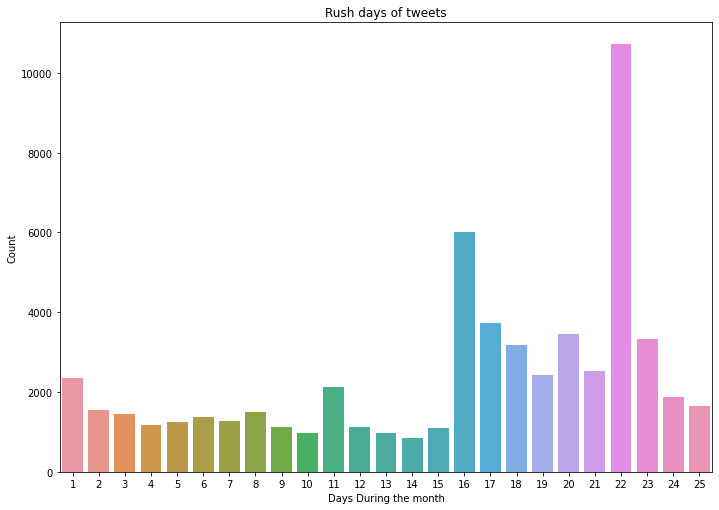

In [166]:
fltrd_G = G[G['tweet_month']== 'April'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_G['tweet_date'].dt.day, data = G)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

>In Nov. peaks are (1,11,16:23).

In [79]:
tt = G.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2021]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2021 users:', (tt.shape[0]))
tt

no. of tweet in same day: 192
no. of tweet from 2021 users: 6570


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
59101,1.386326e+18,April,2021,@jbarro He’s also pretty weird right along wit...,0,05:47:14,2021-04-25,April,1
58185,1.377453e+18,April,2021,#JusticeForJohnnyDepp https://t.co/mkWJYXRPYZ,0,00:04:14,2021-04-01,April,1
58555,1.381236e+18,April,2021,#DeppMovieNight\n#JusticeForJohnnyDepp\n#Johnn...,0,00:33:04,2021-04-11,April,1
58554,1.381228e+18,April,2021,#JohnnyDepp #johnnydeppmovies\n#JusticeForJohn...,0,00:04:16,2021-04-11,April,1
58190,1.377516e+18,April,2021,the overwhelming evidence against her and peop...,0,00:36:49,2021-04-01,April,1
...,...,...,...,...,...,...,...,...,...
52547,1.345205e+18,April,2021,@Rodrigo35410569 @aquaymera @bebequetecuento @...,112,21:16:46,2021-04-25,January,1
52541,1.344981e+18,April,2021,Just a random gorgeous picture of Johnny Depp ...,113,04:13:57,2021-04-24,January,1
52539,1.344981e+18,April,2021,Here is a picture of the tattoo Johnny Depp ha...,113,01:22:34,2021-04-24,January,1
52536,1.344981e+18,April,2021,@BeSafeAndSmile @Chakrangel1 LOL Me too!!!\n\n...,113,01:24:21,2021-04-24,January,1


In [80]:
freq_usrs_apr = G.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_apr.shape[0]))
freq_usrs_apr

no. of all frequent users: 12158


,user.id_str,id_count
0,1.020200e+04,1
1,8.176450e+05,1
2,1.289321e+06,1
3,2.902821e+06,1
4,5.893702e+06,2
...,...,...
12153,1.385924e+18,1
12154,1.385957e+18,1
12155,1.386030e+18,1
12156,1.386213e+18,1


In [81]:
freq_fresh_usrs_apr = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2021) :', (freq_fresh_usrs_apr.shape[0]))
freq_fresh_usrs_apr

no. of frequent fresh users (2021) : 1351


,user.id_str,id_count
0,1.344860e+18,1
1,1.344981e+18,10
2,1.345052e+18,1
3,1.345071e+18,1
4,1.345136e+18,1
...,...,...
1346,1.385924e+18,1
1347,1.385957e+18,1
1348,1.386030e+18,1
1349,1.386213e+18,1


In [82]:
freq_apr_usrs = set(list(freq_fresh_usrs_apr["user.id_str"]))
len(freq_apr_usrs)

1351

In [83]:
freq_apr_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_apr_usrs)]
print('How often did those users created in april tweeted after that in 2020?')
freq_apr_usrs_all_data['tweet_month'].value_counts()

How often did those users created in april tweeted after that in 2020?


April       6570
March       2783
February    1015
January      433
Name: tweet_month, dtype: int64

### (59104 tweets) .. only (12158 users)
#### no. of tweet from fresh users in same day: 192
#### Total no. of tweet from 2021 users: 6570
#### no. of frequent fresh users (2021) : 1351
#### no. of all frequent users: 12158

# March ...

In [167]:
x = clean_df[clean_df['tweet_month']== 'March'].sort_values(["days"], ascending=True)
x = x[x['tweet_month'] == 'March']
print(x.shape[0])
x

70478


,id_str,full_text,user.id_str,user.screen_name,user.name,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
0,1366327088156925952,"Don't really know how Twitter works yet, but t...",1.366325e+18,EdwardK72335033,Edward Kenway,http://pbs.twimg.com/profile_images/1366325486...,1.0,0.0,0.0,0,00:07:35,2021-03-01,09:58:57,2021-03-01,09:51:22,2021,March,2021,March
543,1375540324202905601,I totally agree. The British Court and its cor...,1.375207e+18,PeggyChipman,Peggy Chipman,http://pbs.twimg.com/profile_images/1375207814...,182.0,4.0,46.0,0,22:02:54,2021-03-26,20:09:04,2021-03-25,22:06:10,2021,March,2021,March
544,1375467922878038022,@adam_waldman Es increíble que con todas estas...,1.375462e+18,meydepp8,Meydepp8,http://pbs.twimg.com/profile_images/1375492568...,20.0,0.0,20.0,0,00:22:41,2021-03-26,15:21:22,2021-03-26,14:58:41,2021,March,2021,March
545,1375100228609699844,#JusticeForJohnnyDepp !!!!!!!,1.374843e+18,sonoturstandard,A,http://pbs.twimg.com/profile_images/1375211184...,356.0,18.0,171.0,0,17:03:01,2021-03-25,15:00:17,2021-03-24,21:57:16,2021,March,2021,March
546,1375467352968466439,@adam_waldman #JusticeForJohnnyDepp ✊🏻,1.375462e+18,meydepp8,Meydepp8,http://pbs.twimg.com/profile_images/1375492568...,20.0,0.0,20.0,0,00:20:25,2021-03-26,15:19:06,2021-03-26,14:58:41,2021,March,2021,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192511,1377135665033342983,The absolute constant torrent of rage and abus...,8.176440e+05,Slobbodany,Slobs Kilalot,http://pbs.twimg.com/profile_images/26169692/l...,2847.0,52.0,147.0,5137,19:35:29,2021-03-31,05:48:23,2007-03-07,10:12:54,2021,March,2007,March
192763,1372885521576300549,Boo Amber Heard boo!,7.551640e+05,afifrais,Afif,http://pbs.twimg.com/profile_images/638720030/...,12882.0,162.0,6.0,5155,03:55:39,2021-03-19,12:19:49,2007-02-06,08:24:10,2021,March,2007,February
192872,1375876088891604995,"I'd really, really like someone to do a #deepf...",7.370230e+05,TheBeardyJim,Beardy Jim | Wayfarer,http://pbs.twimg.com/profile_images/1378848989...,23486.0,724.0,1206.0,5169,07:52:01,2021-03-27,18:23:16,2007-01-31,10:31:15,2021,March,2007,January
193088,1375043575432495105,Johnny Depp refused permission to appeal High ...,6.124730e+05,BBCNews,BBC News (UK),http://pbs.twimg.com/profile_images/1150718511...,450147.0,12250846.0,93.0,5190,03:09:13,2021-03-25,11:15:10,2007-01-08,08:05:57,2021,March,2007,January


In [86]:
clean_df[clean_df['tweet_month'] == 'March']['user.id_str'].value_counts()

9.031785e+17    917
1.298871e+18    877
2.323774e+08    835
9.322292e+17    743
1.301262e+18    541
               ... 
2.383338e+09      1
1.185784e+18      1
1.221088e+18      1
1.363683e+18      1
4.909017e+09      1
Name: user.id_str, Length: 22009, dtype: int64

In [87]:
print('Fresh users in 2020 are most tweeted on Mar.')
x['usr_year'].value_counts()

Fresh users in 2020 are most tweeted on Mar.


2020    22304
2017     6104
2019     5755
2021     5101
2009     4266
2011     4126
2018     3663
2010     3259
2013     3256
2016     3169
2015     3123
2012     2992
2014     2643
2007      404
2008      312
2006        1
Name: usr_year, dtype: int64

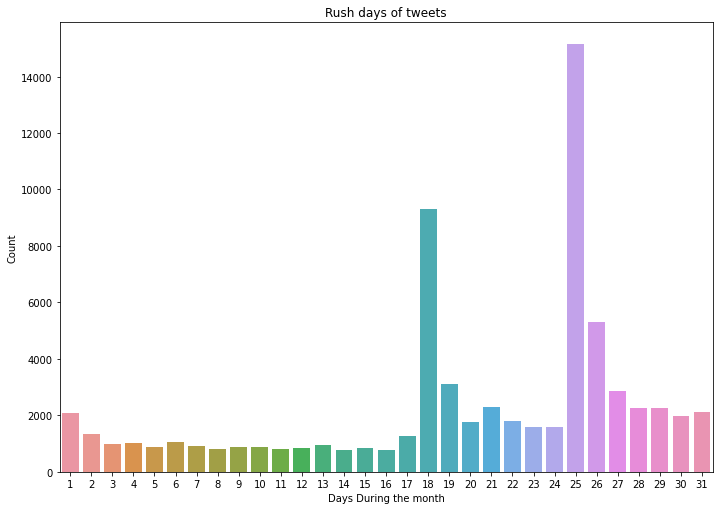

In [168]:
fltrd_x = x[x['tweet_month']== 'March'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_x['tweet_date'].dt.day, data = x)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> In Mar. Peaks are (1, 18, 19, 25, 26, 27)

In [94]:
tt = x.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2021]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2021 users:', (tt.shape[0]))
tt

no. of tweet in same day: 316
no. of tweet from 2021 users: 5101


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
70477,1.377280e+18,March,2021,@Eve_Barlow This is very embarrassing. People ...,0,00:10:47,2021-03-31,March,1
70328,1.375057e+18,March,2021,"•“You're braver than you believe, and stronger...",0,00:11:56,2021-03-25,March,1
70327,1.375050e+18,March,2021,My New #Logo #Design . Is'nt it eye-catching?\...,0,01:10:39,2021-03-25,March,1
70325,1.375049e+18,March,2021,@edscissorhvnds #JusticeForJohnnyDepp,0,00:21:54,2021-03-25,March,1
70323,1.375049e+18,March,2021,@JohnnyDepp_hd @JerrieDepp @ReemDepp @DeppUrug...,0,09:37:12,2021-03-25,March,1
...,...,...,...,...,...,...,...,...,...
65433,1.345506e+18,March,2021,Johnny's fan are going to give you a REALITY c...,86,08:13:33,2021-03-30,January,1
65435,1.345506e+18,March,2021,Kindly STFU with your FALSE allegations of abu...,86,07:53:39,2021-03-30,January,1
65399,1.345277e+18,March,2021,@dreamadcollins @adam_waldman I don't remember...,87,09:18:08,2021-03-30,January,1
65438,1.345506e+18,March,2021,Sorry but you're a 12th rate flunky who needs ...,87,21:26:00,2021-03-31,January,1


In [90]:
freq_usrs_mar = x.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_mar.shape[0]))
freq_usrs_mar

no. of all frequent users: 22009


,user.id_str,id_count
0,2.225300e+04,1
1,6.124730e+05,1
2,7.370230e+05,1
3,7.551640e+05,1
4,8.176440e+05,1
...,...,...
22004,1.376759e+18,2
22005,1.376827e+18,1
22006,1.376844e+18,1
22007,1.377031e+18,1


In [91]:
freq_fresh_usrs_mar = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2021) :', (freq_fresh_usrs_mar.shape[0]))
freq_fresh_usrs_mar

no. of frequent fresh users (2021) : 1779


,user.id_str,id_count
0,1.344852e+18,1
1,1.344868e+18,1
2,1.344879e+18,1
3,1.344957e+18,1
4,1.344981e+18,7
...,...,...
1774,1.376759e+18,2
1775,1.376827e+18,1
1776,1.376844e+18,1
1777,1.377031e+18,1


In [92]:
freq_mar_usrs = set(list(freq_fresh_usrs_mar["user.id_str"]))
len(freq_mar_usrs)

1779

In [93]:
freq_mar_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_mar_usrs)]
print('How often did those users created in march tweeted after that in 2021?')
freq_mar_usrs_all_data['tweet_month'].value_counts()

How often did those users created in march tweeted after that in 2021?


March       5101
April       4094
February    1396
January      619
Name: tweet_month, dtype: int64

### (70478 tweets) .. only (22009 users)
#### no. of tweet from fresh users in same day: 316
#### Total no. of tweet from 2021 users: 5101
#### no. of frequent fresh users (2021) : 1779
#### no. of all frequent users: 22009

# January ...

In [170]:
q = clean_df[clean_df['tweet_month']== 'January'].sort_values(["days"], ascending=True)
q = q[q['tweet_month'] == 'January']
print(q.shape[0])
q

55845


,id_str,full_text,user.id_str,user.screen_name,user.name,user.profile_image_url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
4,1355010951322476546,Amber Heard’s behaviors are absolutely sickeni...,1.355004e+18,TheAnon63938801,lyrics_r_loud,http://pbs.twimg.com/profile_images/1355004656...,9.0,6.0,109.0,0,00:25:39,2021-01-29,04:32:40,2021-01-29,04:07:01,2021,January,2021,January
447,1347790820456476672,Johnny Depp Says Amber Heard Didn’t Donate $7M...,1.347438e+18,Magathea1,Magathea,http://pbs.twimg.com/profile_images/1347438638...,239.0,4.0,19.0,0,23:20:24,2021-01-09,06:22:26,2021-01-08,07:02:02,2021,January,2021,January
451,1349521490920824834,#JusticeForJohnnyDepp,1.349519e+18,FernandaPazSae1,Fernanda Paz Saez Quezada,http://pbs.twimg.com/profile_images/1349519527...,13.0,13.0,92.0,0,00:09:02,2021-01-14,00:59:30,2021-01-14,00:50:28,2021,January,2021,January
452,1349522198118195207,#JusticeForJohnnyDepp #NotABot we want to show...,1.349518e+18,AndreaOldfield6,Andrea Oldfield,http://pbs.twimg.com/profile_images/1349518123...,679.0,31.0,62.0,0,00:17:47,2021-01-14,01:02:19,2021-01-14,00:44:32,2021,January,2021,January
461,1347741881170423810,Amber heard is liar #JusticeForJohnnyDepp,1.347465e+18,Unknown46199362,UnknownPerson_816,http://abs.twimg.com/sticky/default_profile_im...,4.0,0.0,2.0,0,18:20:47,2021-01-09,03:07:58,2021-01-08,08:47:11,2021,January,2021,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190506,1349319763764404224,Amber Heard implique les studios Disney dans s...,2.649991e+06,20Minutes,20 Minutes,http://pbs.twimg.com/profile_images/9097761662...,416251.0,2464824.0,917.0,5039,23:23:17,2021-01-13,11:37:55,2007-03-28,12:14:38,2021,January,2007,March
190572,1347345502858321923,"Imagine, with everything going on in the world...",1.633331e+06,patchdrury,Rev. PatchDrury,http://pbs.twimg.com/profile_images/1304827402...,27854.0,428.0,309.0,5042,10:17:27,2021-01-08,00:52:55,2007-03-20,14:35:28,2021,January,2007,March
190852,1347387668175446019,Johnny Depp accuses Amber Heard of pocketing $...,8.176450e+05,WeSmirch,WeSmirch,http://pbs.twimg.com/profile_images/26169952/w...,120474.0,2807.0,4.0,5055,17:26:48,2021-01-08,03:40:28,2007-03-07,10:13:40,2021,January,2007,March
191736,1347258675551825921,Not to be confused with the movie in which Kev...,7.563020e+05,kukkurovaca,Nick,http://pbs.twimg.com/profile_images/2858874743...,275035.0,574.0,466.0,5082,22:33:25,2021-01-07,19:07:53,2007-02-07,20:34:28,2021,January,2007,February


In [105]:
clean_df[clean_df['tweet_month'] == 'January']['user.id_str'].value_counts()

2.763945e+08    656
2.241916e+09    554
2.323774e+08    429
4.220488e+08    371
1.236500e+18    369
               ... 
1.152113e+18      1
3.339856e+07      1
9.618351e+17      1
1.199344e+18      1
4.319432e+08      1
Name: user.id_str, Length: 12356, dtype: int64

In [97]:
print('Fresh users in 2021 are most tweeted on Jan.')
q['usr_year'].value_counts()

Fresh users in 2021 are most tweeted on Jan.


2020    21857
2019     4966
2011     3931
2009     3366
2017     3273
2018     2977
2013     2479
2012     2349
2010     2347
2014     2257
2016     2225
2015     2155
2021     1037
2008      322
2007      303
2006        1
Name: usr_year, dtype: int64

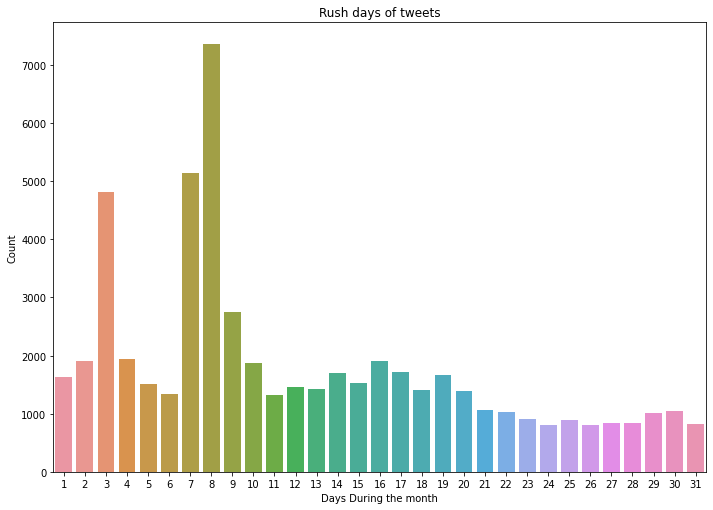

In [171]:
fltrd_q = q[q['tweet_month']== 'January'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_q['tweet_date'].dt.day, data = q)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

> In Jan. Peaks are (3, 7, 8, 9)

In [106]:
tt = q.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2021]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in same day:', (tt[tt["days"] <=1].shape[0]))
print('no. of tweet from 2021 users:', (tt.shape[0]))
tt

no. of tweet in same day: 265
no. of tweet from 2021 users: 1037


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
55325,1.347280e+18,January,2021,@sourpatchlyds Nobody has ever made as sick as...,0,03:54:13,2021-01-08,January,1
55362,1.347553e+18,January,2021,how bad could this guy be??? His love for chil...,0,18:43:06,2021-01-09,January,1
55361,1.347553e+18,January,2021,@JarOfTurd #WeLoveYouJohnny\n#JusticeForJohnny...,0,18:32:15,2021-01-09,January,1
55360,1.347553e+18,January,2021,@Izze1122 #JusticeForJohnnyDepp \n#AmberHeardI...,0,23:52:31,2021-01-09,January,1
55356,1.347467e+18,January,2021,😉#johnnydepp #good #courtroom #JusticeForJohnn...,0,10:09:03,2021-01-08,January,1
...,...,...,...,...,...,...,...,...,...
54815,1.344981e+18,January,2021,"@StevieJRaw After everything is said and done,...",28,22:09:59,2021-01-30,January,1
54894,1.345506e+18,January,2021,What is Amber Heard worth? https://t.co/fB40N8...,28,22:44:19,2021-01-31,January,1
54875,1.345420e+18,January,2021,@LBJeff4 @aburkhartlaw @FMGiveMeTruth @LauraBo...,28,03:29:48,2021-01-30,January,1
54818,1.344981e+18,January,2021,@lostbeyondpluto I have been following MM on Y...,28,22:18:08,2021-01-30,January,1


In [107]:
freq_usrs_jan = q.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of all frequent users:', (freq_usrs_jan.shape[0]))
freq_usrs_jan

no. of all frequent users: 12356


,user.id_str,id_count
0,1.321500e+04,1
1,7.563020e+05,1
2,8.176450e+05,1
3,1.633331e+06,1
4,2.649991e+06,2
...,...,...
12351,1.355462e+18,1
12352,1.355572e+18,2
12353,1.355696e+18,4
12354,1.355839e+18,1


In [108]:
freq_fresh_usrs_jan = tt.groupby('user.id_str').size().reset_index(name='id_count')
print('no. of frequent fresh users (2021) :', (freq_fresh_usrs_jan.shape[0]))
freq_fresh_usrs_jan

no. of frequent fresh users (2021) : 310


,user.id_str,id_count
0,1.344801e+18,1
1,1.344821e+18,1
2,1.344823e+18,1
3,1.344882e+18,2
4,1.344900e+18,1
...,...,...
305,1.355462e+18,1
306,1.355572e+18,2
307,1.355696e+18,4
308,1.355839e+18,1


In [109]:
freq_jan_usrs = set(list(freq_fresh_usrs_jan["user.id_str"]))
len(freq_jan_usrs)

310

In [110]:
freq_jan_usrs_all_data = clean_df[clean_df['user.id_str'].isin(freq_jan_usrs)]
print('How often did those users created in january tweeted after that in 2021?')
freq_jan_usrs_all_data['tweet_month'].value_counts()

How often did those users created in january tweeted after that in 2021?


January     1037
February     811
April        760
March        729
Name: tweet_month, dtype: int64

### The same here (55845 tweets) .. (12356 users)
#### no. of tweet from fresh users in same day: 265
#### Total no. of tweet from 2021 users: 1037
#### no. of frequent fresh users (2021) : 310
#### no. of all frequent users: 17055

## The sorting according to days diff. between usr creation and tweet and relating to month of tweets many usrs tweeted offenssively after their account creation with less than  few min.s!

> Some dates have the most of tweets which made them trendy must have some events before or after them.

> Percentage between fresh created users and their tweets in the same day is also interesting.

> Percentage of tweets by fresh users in the whole year or each month is also interesting according to the shape of the whole data as they always have the higher percentage of tweets within all users.

> Also users created 2020 is more tweeting than others with least followers and friends counts for their profile which means they don't have much activities on their profile.

> Many tweets are from same user in the same day that means percentage of fresh users is also interesting.